<h1>Some Concepts</h1>
<p>
We will use the <a href="http://konect.uni-koblenz.de/networks/moreno_zebra">Zebra Affiliation</a> dataset to explore some concepts linked to graph theory. <br>
This undirected network contains interactions between 28 Grévy's zebras (Equus grevyi) in Kenya. A node represents a zebra and an edge between two zebras shows that there was an interaction between them during the study.
</p>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import numpy as np
import community 


from itertools import combinations
from nxviz import ArcPlot
from nxviz import CircosPlot
from nxviz import MatrixPlot
from hiveplot import HivePlot
from matplotlib.lines import Line2D
from matplotlib import pyplot



warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
#load the network
dfzebras = pd.read_csv(
    'data/moreno_zebra/out.moreno_zebra_zebra', sep=' ', skiprows=2, header=None)
dfzebras = dfzebras[[0, 1]]
dfzebras.columns = ['zebra1', 'zebra2']

Gzebras = nx.Graph()
for row in dfzebras.iterrows():
    Gzebras.add_edge(row[1]['zebra1'], row[1]['zebra2'])

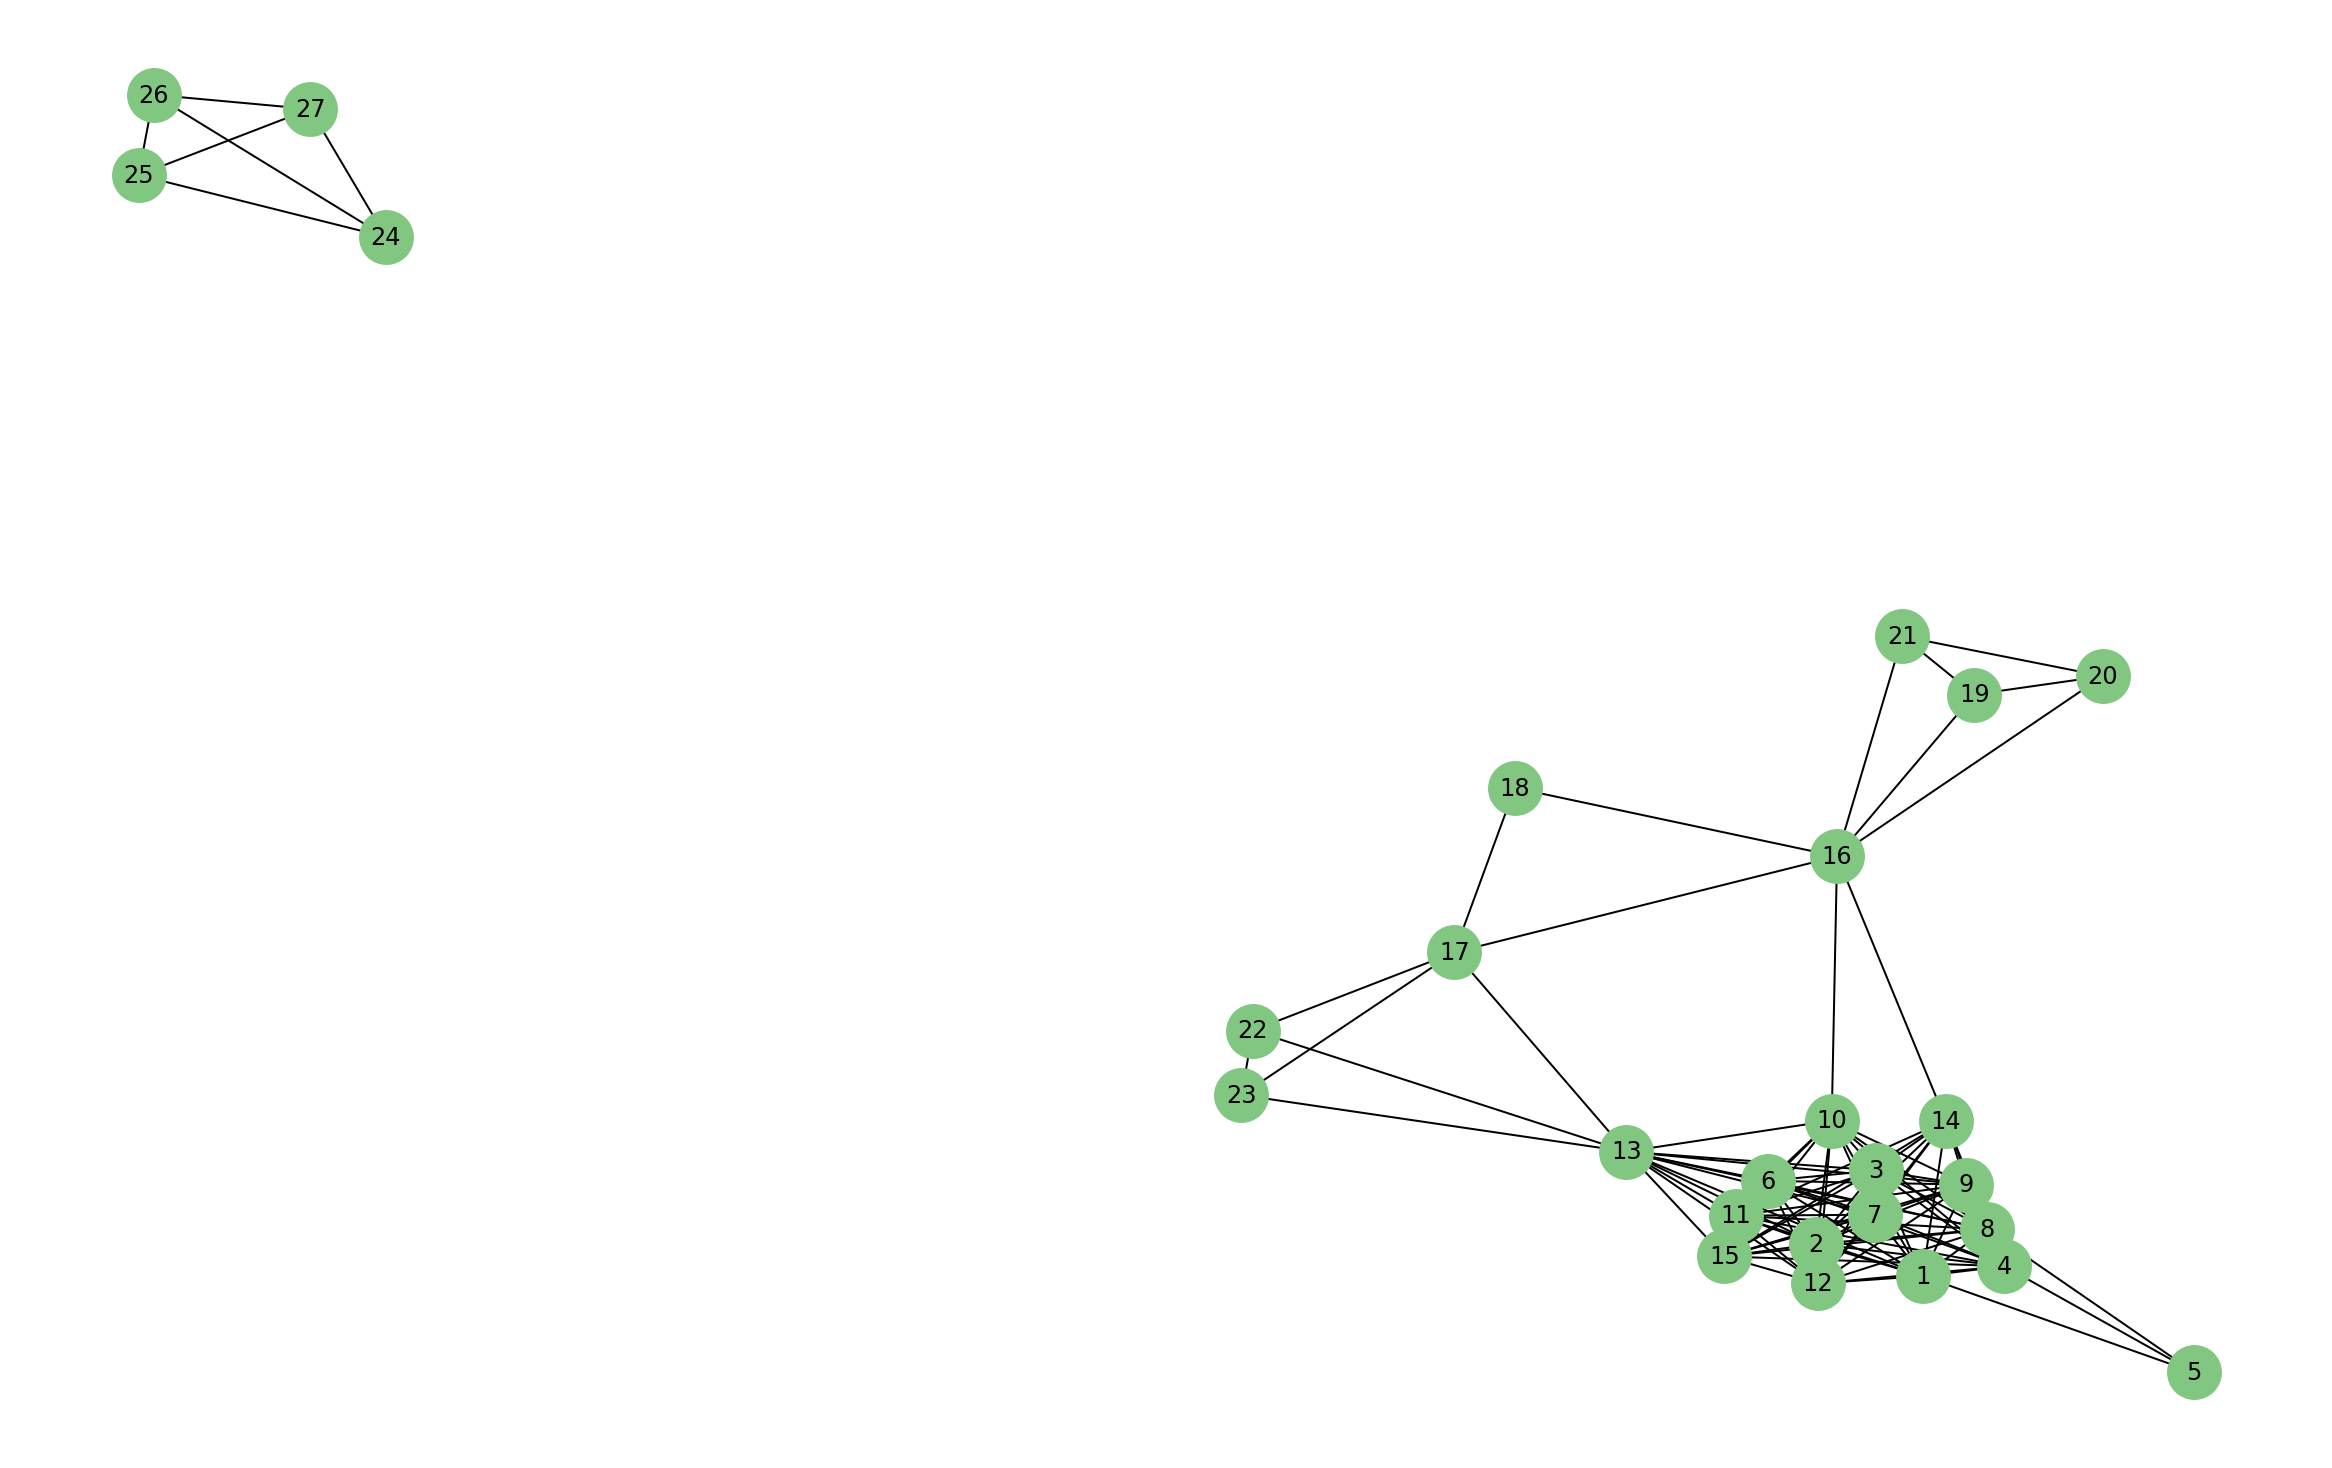

In [3]:
plt.rcParams["figure.figsize"] = (16,10)
nx.draw_spring(Gzebras , with_labels=True , node_color='#81c781' , node_size=700)

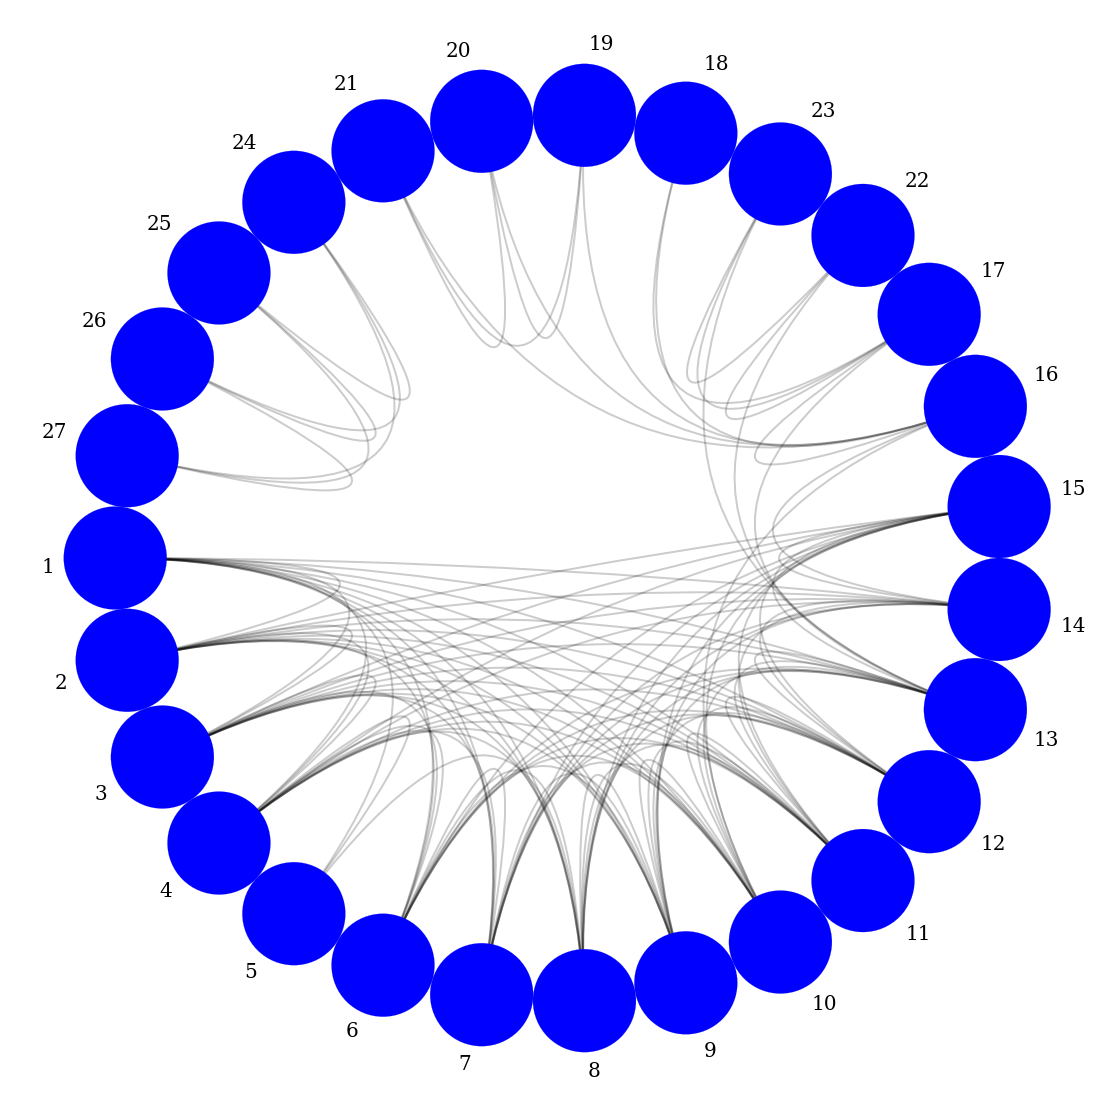

In [4]:
c = CircosPlot(Gzebras , node_labels=True , figsize = (10,10))
c.draw()

<h3>Connected Component</h3>

By looking at these graphs we can infer that the graph can be divided into two smaller subgraphs, which any two vertices are connected by paths, and are connected to no additional vertices of the supergraph.

A subgraph that meets those criteria is called <b>Connected Component</b> (or simply Component).

A vertex with no incident edges is itself a component.

<code>networkx</code> implements a function to find connected component, <code>connected_components()</code>

In [5]:
nx.connected_components(Gzebras)

<generator object connected_components at 0x00000191579549C8>

In [6]:
# in order to use them better, it's useful to create a list of connected component subgraphs
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

ccsubgraphszebras = list(connected_component_subgraphs(Gzebras))
ccsubgraphszebras

<p>
As we can see we can find two connected components in the graph. Let's highlight them with some plots.
</p>

In [7]:
# assign an attribute "subgraph" to the nodes
for i, g in enumerate(ccsubgraphszebras):
    for n in g.nodes():
        Gzebras.nodes[n]['subgraph'] = i

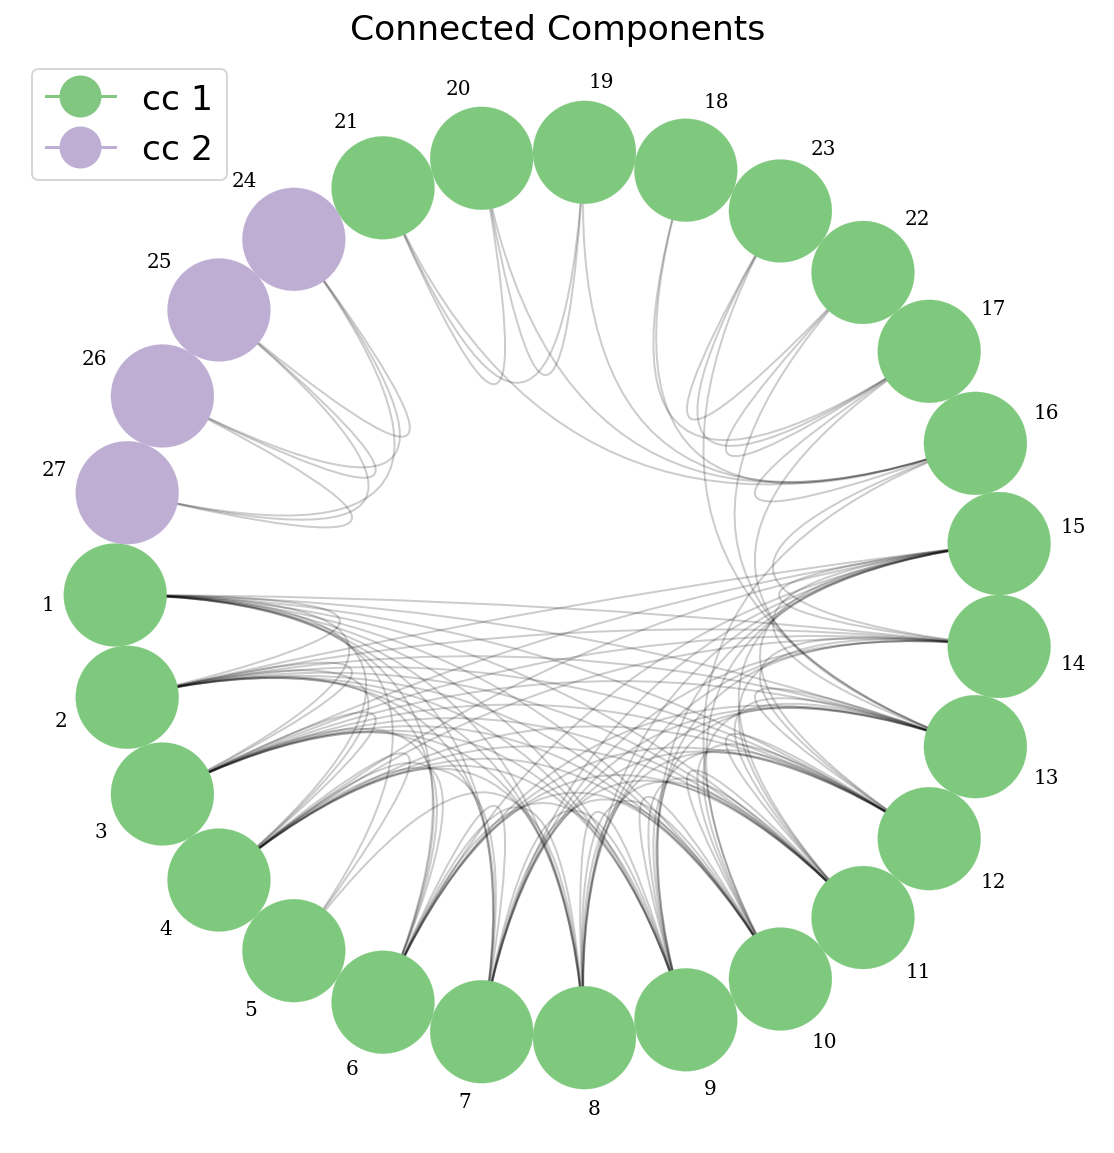

In [8]:
# we can use the attribute to highlight the connected component in a circos plot
c = CircosPlot(Gzebras, node_color='subgraph', node_order='subgraph', node_labels=True , figsize = (10,10))
c.draw()

legend_elements = [Line2D([0], [0], marker='o', color='#81c781', label='cc 1', markerfacecolor='#81c781', markersize=20),
                   Line2D([0], [0], marker='o', color='#beaed4', label='cc 2', markerfacecolor='#beaed4', markersize=20)
                  ]

plt.legend(handles=legend_elements , fontsize='xx-large')
plt.title("Connected Components" , fontsize='xx-large')
plt.show()

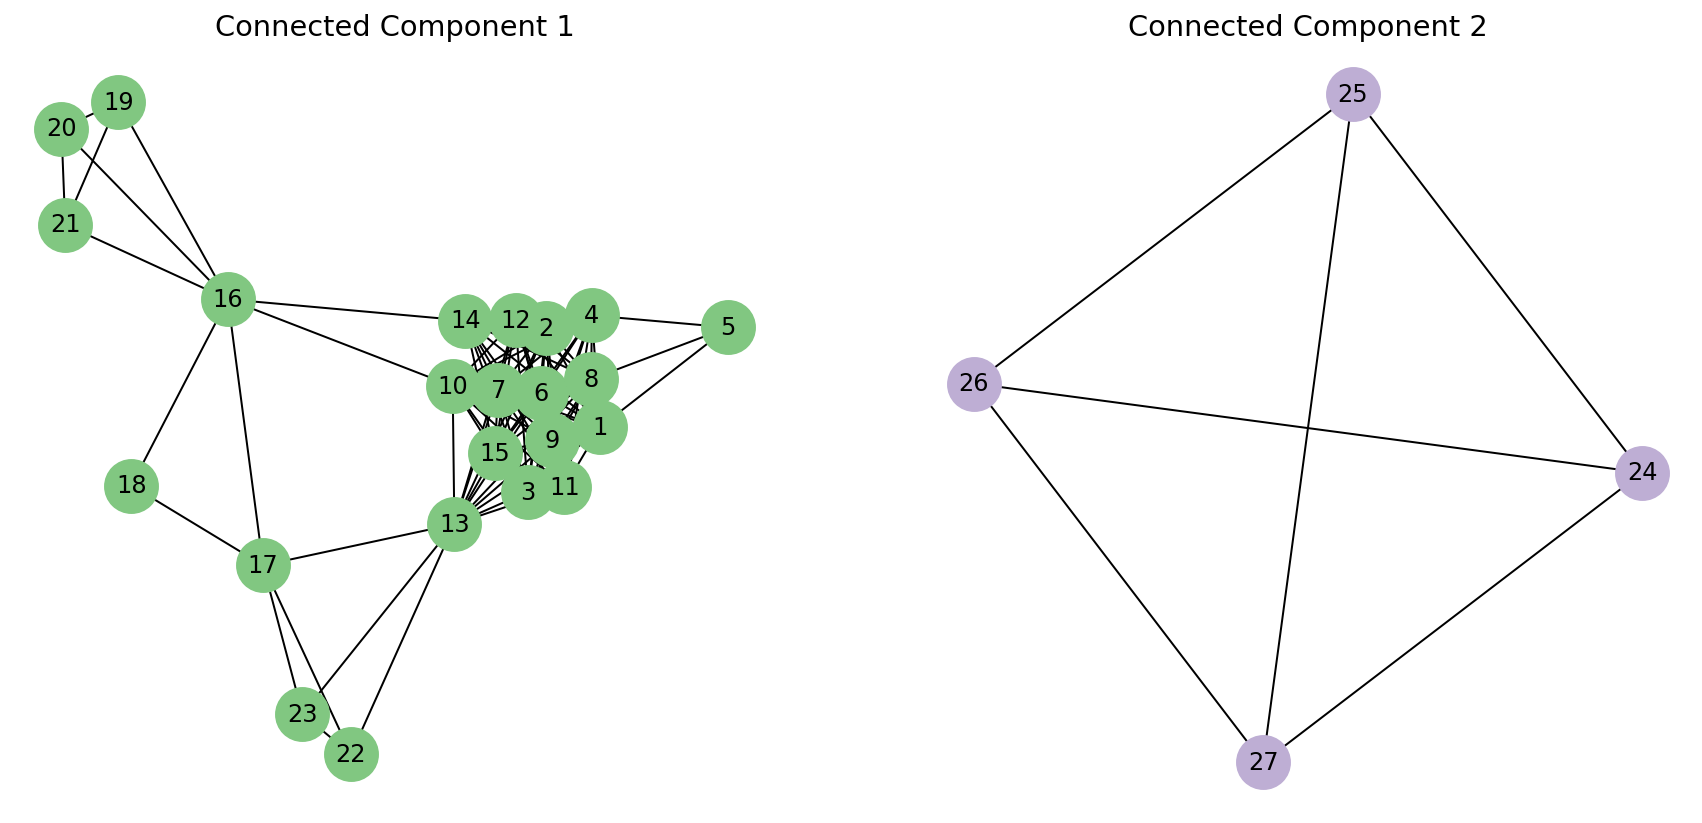

In [9]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
nx.draw(ccsubgraphszebras[0] , with_labels=True , node_color="#81c781" , node_size=700)
plt.title("Connected Component 1" , fontsize='x-large')


plt.subplot(1, 2, 2)
nx.draw(ccsubgraphszebras[1] , with_labels=True , node_color='#beaed4' , node_size=700)
plt.title("Connected Component 2" , fontsize='x-large')

plt.show()

<h3>Path</h3>

In a graph, a path is a sequence of edges which joins a sequence of distinct vertices.

In <code>networkx</code> we can check the existence of a path with <code>has_path(graph, nodeA, nodeB)</code>

We can check that nodes belonging to a connected component subgraph are connected by a path and that there is no path between nodes belonging to different connected components.

In [10]:
def has_all_paths(graphA , graphB):
    for a in graphA:
        for b in graphB:
            assert nx.has_path(Gzebras , a , b) , "Error: no path between nodes " + str (a) + " and " + str (b)
            
def has_no_paths(graphA , graphB):
    for a in graphA:
        for b in graphB:
            assert not nx.has_path(Gzebras , a , b) , "Error: no path between nodes " + str (a) + " and " + str (b)         

In [11]:
has_all_paths(ccsubgraphszebras[0] , ccsubgraphszebras[0])

In [12]:
has_all_paths(ccsubgraphszebras[1] , ccsubgraphszebras[1])

In [13]:
has_no_paths(ccsubgraphszebras[1] , ccsubgraphszebras[0])

<h3>Neighbourhood </h3>

Two nodes are called <b>adjacent</b> if they are connected by an edge.
The <b>neighbourhood</b> of a node n is the graph made of the nodes adjacent to n and the edges connecting them.

In <code>networkx</code> we can use <code>graph.neighbors(node)</code> to find the nodes adjacent to the given node.

In [14]:
# neighbors returns a dict_keyiterator, we'll cast it to list to make it printable
list(Gzebras.neighbors(16))

[10, 14, 17, 18, 19, 20, 21]

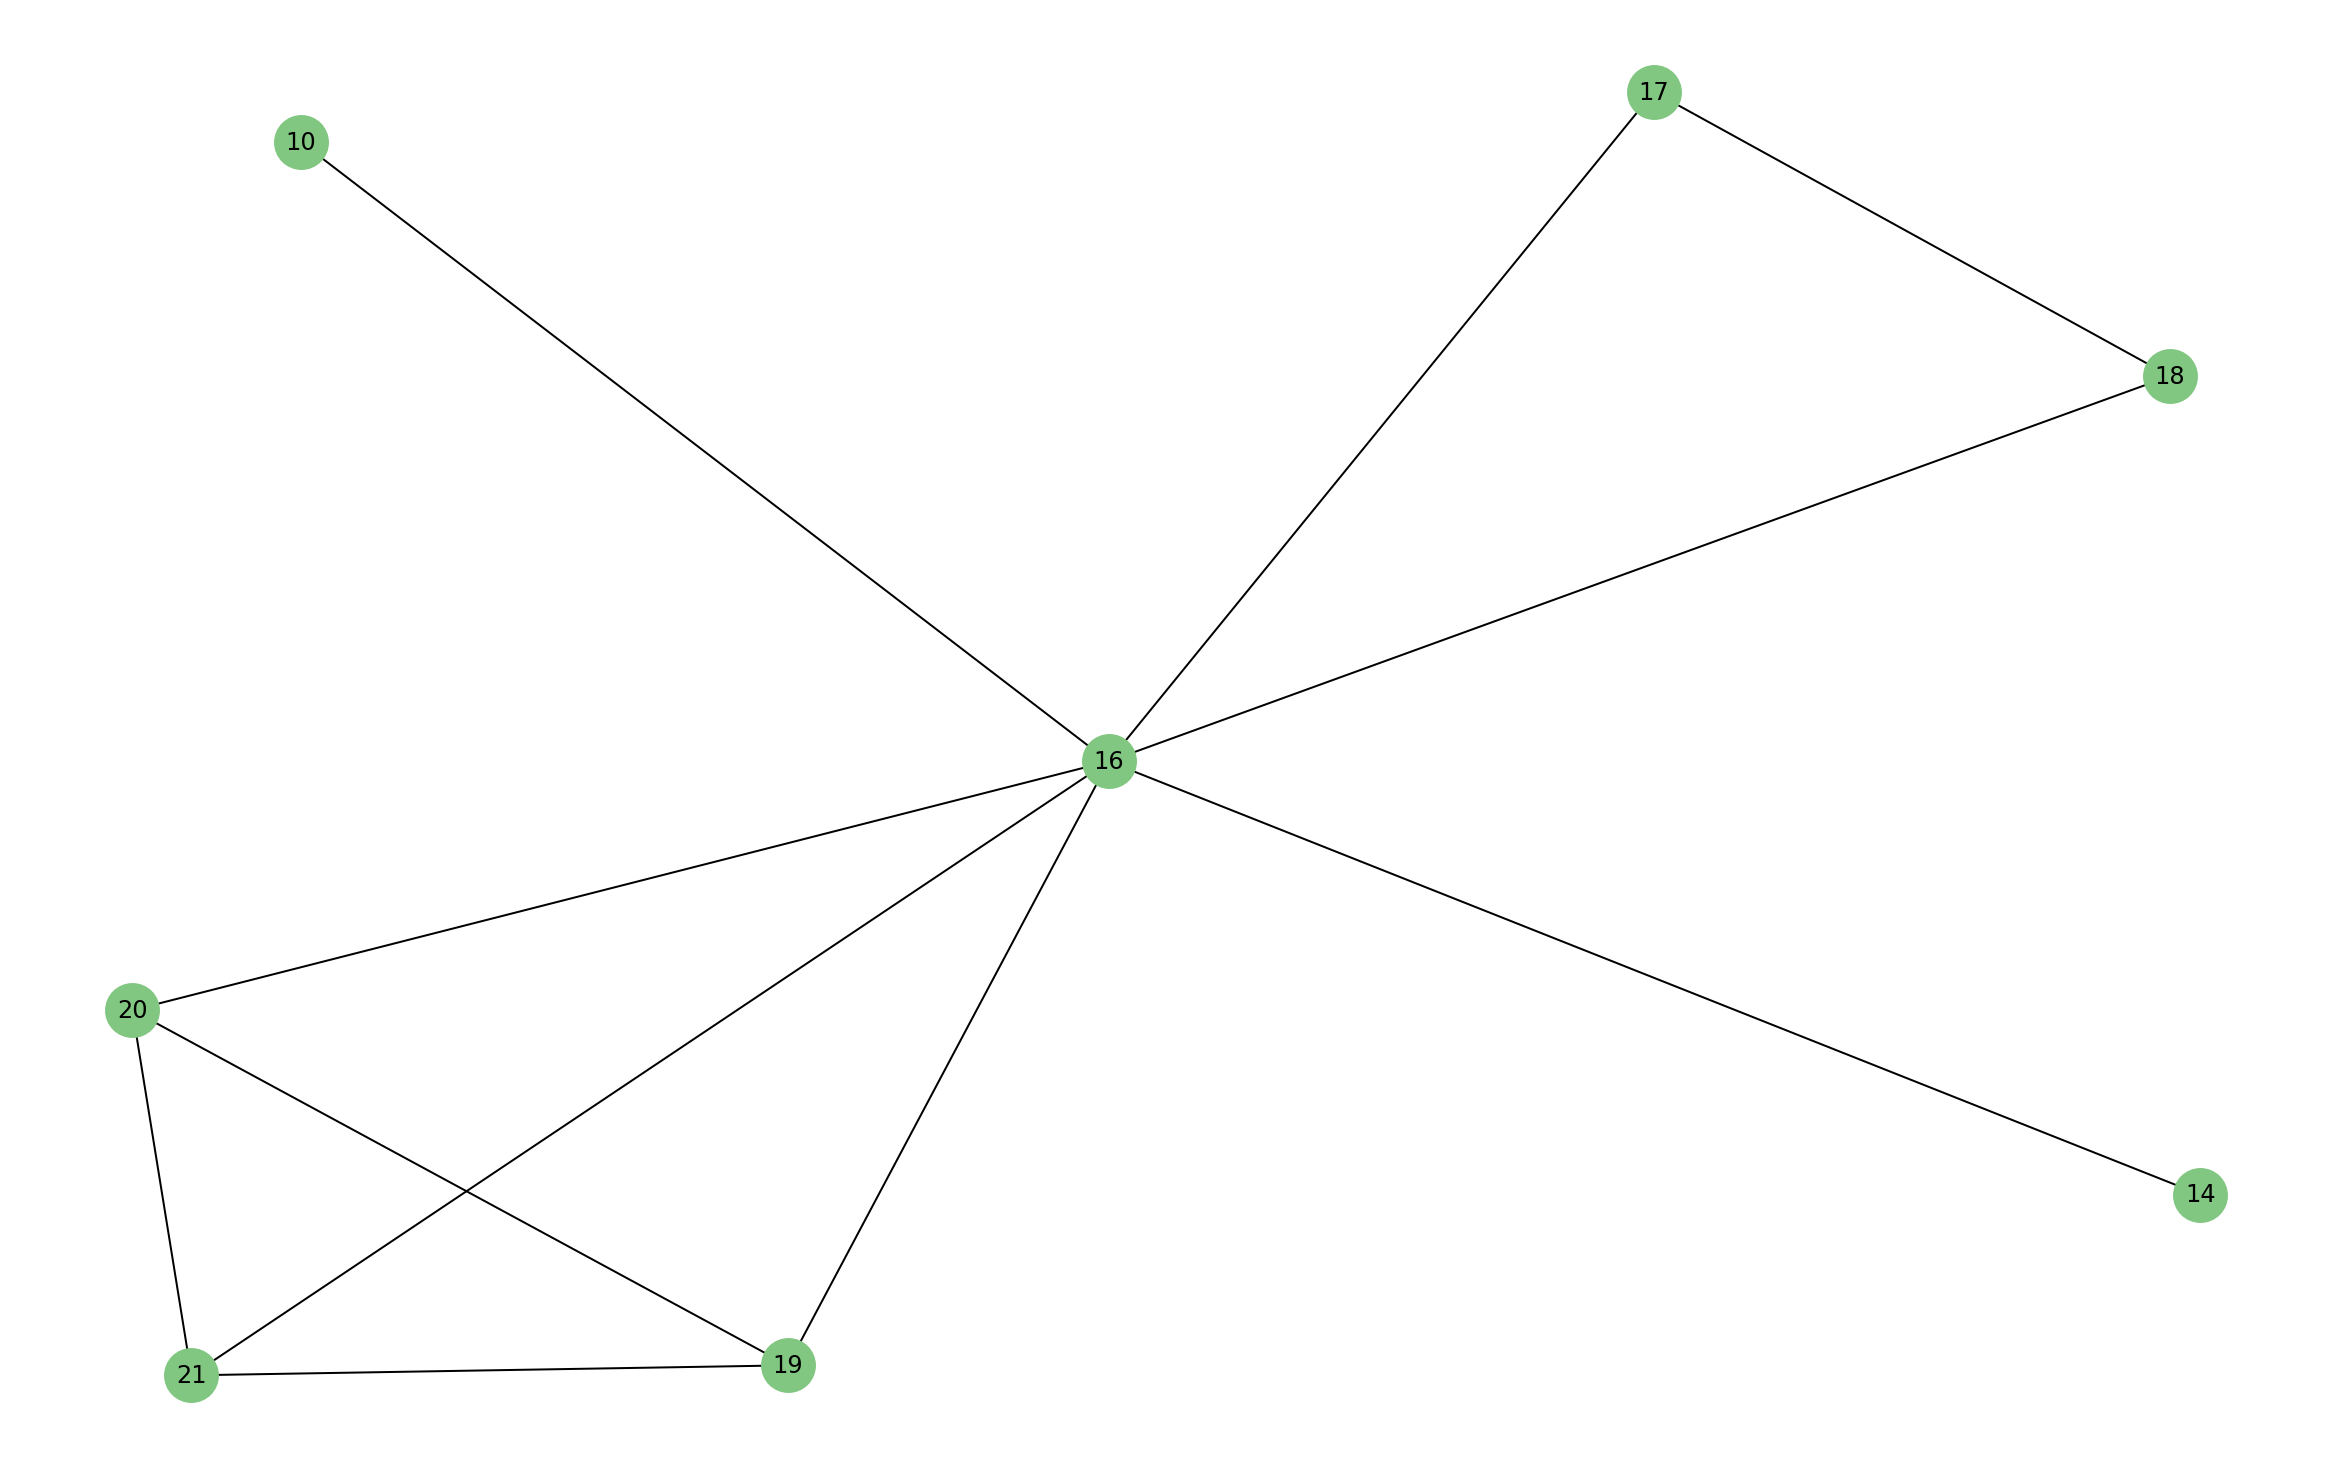

In [15]:
# let's print the subgraph containing the node 16 and his neighbourhood
neighbors16 =  list(Gzebras.neighbors(16))
neighbors16.append(16) # add node 16 to his neighbours
nx.draw(Gzebras.subgraph(neighbors16), with_labels=True , node_color="#81c781" , node_size=700)

<h3>Clique</h3>

In the graph theory, a clique is a subset of vertices of an undirected graph such that every two distinct vertices in the clique are adjacent.
In a social network involving people, cliques are groups in which everybody knows everybody.


<code>networkx</code> has a function <code>find_cliques(graph)</code> that find all the maximal cliques (i.e. largest complete subgraph containing a given node) in a graph.

In [16]:
list(nx.find_cliques(Gzebras))

[[4, 1, 2, 3, 9, 11, 12, 6, 10, 8],
 [4, 1, 2, 3, 9, 11, 12, 6, 10, 7],
 [4, 1, 2, 3, 9, 11, 12, 14, 8],
 [4, 1, 2, 3, 9, 11, 12, 14, 7],
 [4, 1, 5, 8],
 [4, 15, 2, 3, 9, 11, 12, 6, 10, 8],
 [4, 15, 2, 3, 9, 11, 12, 6, 10, 7],
 [4, 15, 2, 3, 9, 11, 12, 14, 8],
 [4, 15, 2, 3, 9, 11, 12, 14, 7],
 [13, 17, 22, 23],
 [13, 2, 3, 6, 9, 10, 11, 12, 8, 1],
 [13, 2, 3, 6, 9, 10, 11, 12, 8, 15],
 [13, 2, 3, 6, 9, 10, 11, 12, 7, 1],
 [13, 2, 3, 6, 9, 10, 11, 12, 7, 15],
 [14, 16],
 [16, 19, 20, 21],
 [16, 17, 18],
 [16, 10],
 [24, 25, 26, 27]]

we can also use <code>cliques_containing_node(graph, nodes=node)</code> to lists the cliques that any given node is involved in.

In [17]:
nx.cliques_containing_node(Gzebras, nodes=3)

[[4, 1, 2, 3, 9, 11, 12, 6, 10, 8],
 [4, 1, 2, 3, 9, 11, 12, 6, 10, 7],
 [4, 1, 2, 3, 9, 11, 12, 14, 8],
 [4, 1, 2, 3, 9, 11, 12, 14, 7],
 [4, 15, 2, 3, 9, 11, 12, 6, 10, 8],
 [4, 15, 2, 3, 9, 11, 12, 6, 10, 7],
 [4, 15, 2, 3, 9, 11, 12, 14, 8],
 [4, 15, 2, 3, 9, 11, 12, 14, 7],
 [13, 2, 3, 6, 9, 10, 11, 12, 8, 1],
 [13, 2, 3, 6, 9, 10, 11, 12, 8, 15],
 [13, 2, 3, 6, 9, 10, 11, 12, 7, 1],
 [13, 2, 3, 6, 9, 10, 11, 12, 7, 15]]

we can use <code>number_of_cliques(graph, nodes=node)</code> in orer to find the number of cliques a node is involved in.

In [18]:
nx.number_of_cliques(Gzebras)

{1: 7,
 2: 12,
 3: 12,
 4: 9,
 5: 1,
 6: 8,
 7: 6,
 8: 7,
 9: 12,
 10: 9,
 11: 12,
 12: 12,
 13: 5,
 14: 5,
 15: 6,
 16: 4,
 17: 2,
 22: 1,
 23: 1,
 18: 1,
 19: 1,
 20: 1,
 21: 1,
 24: 1,
 25: 1,
 26: 1,
 27: 1}

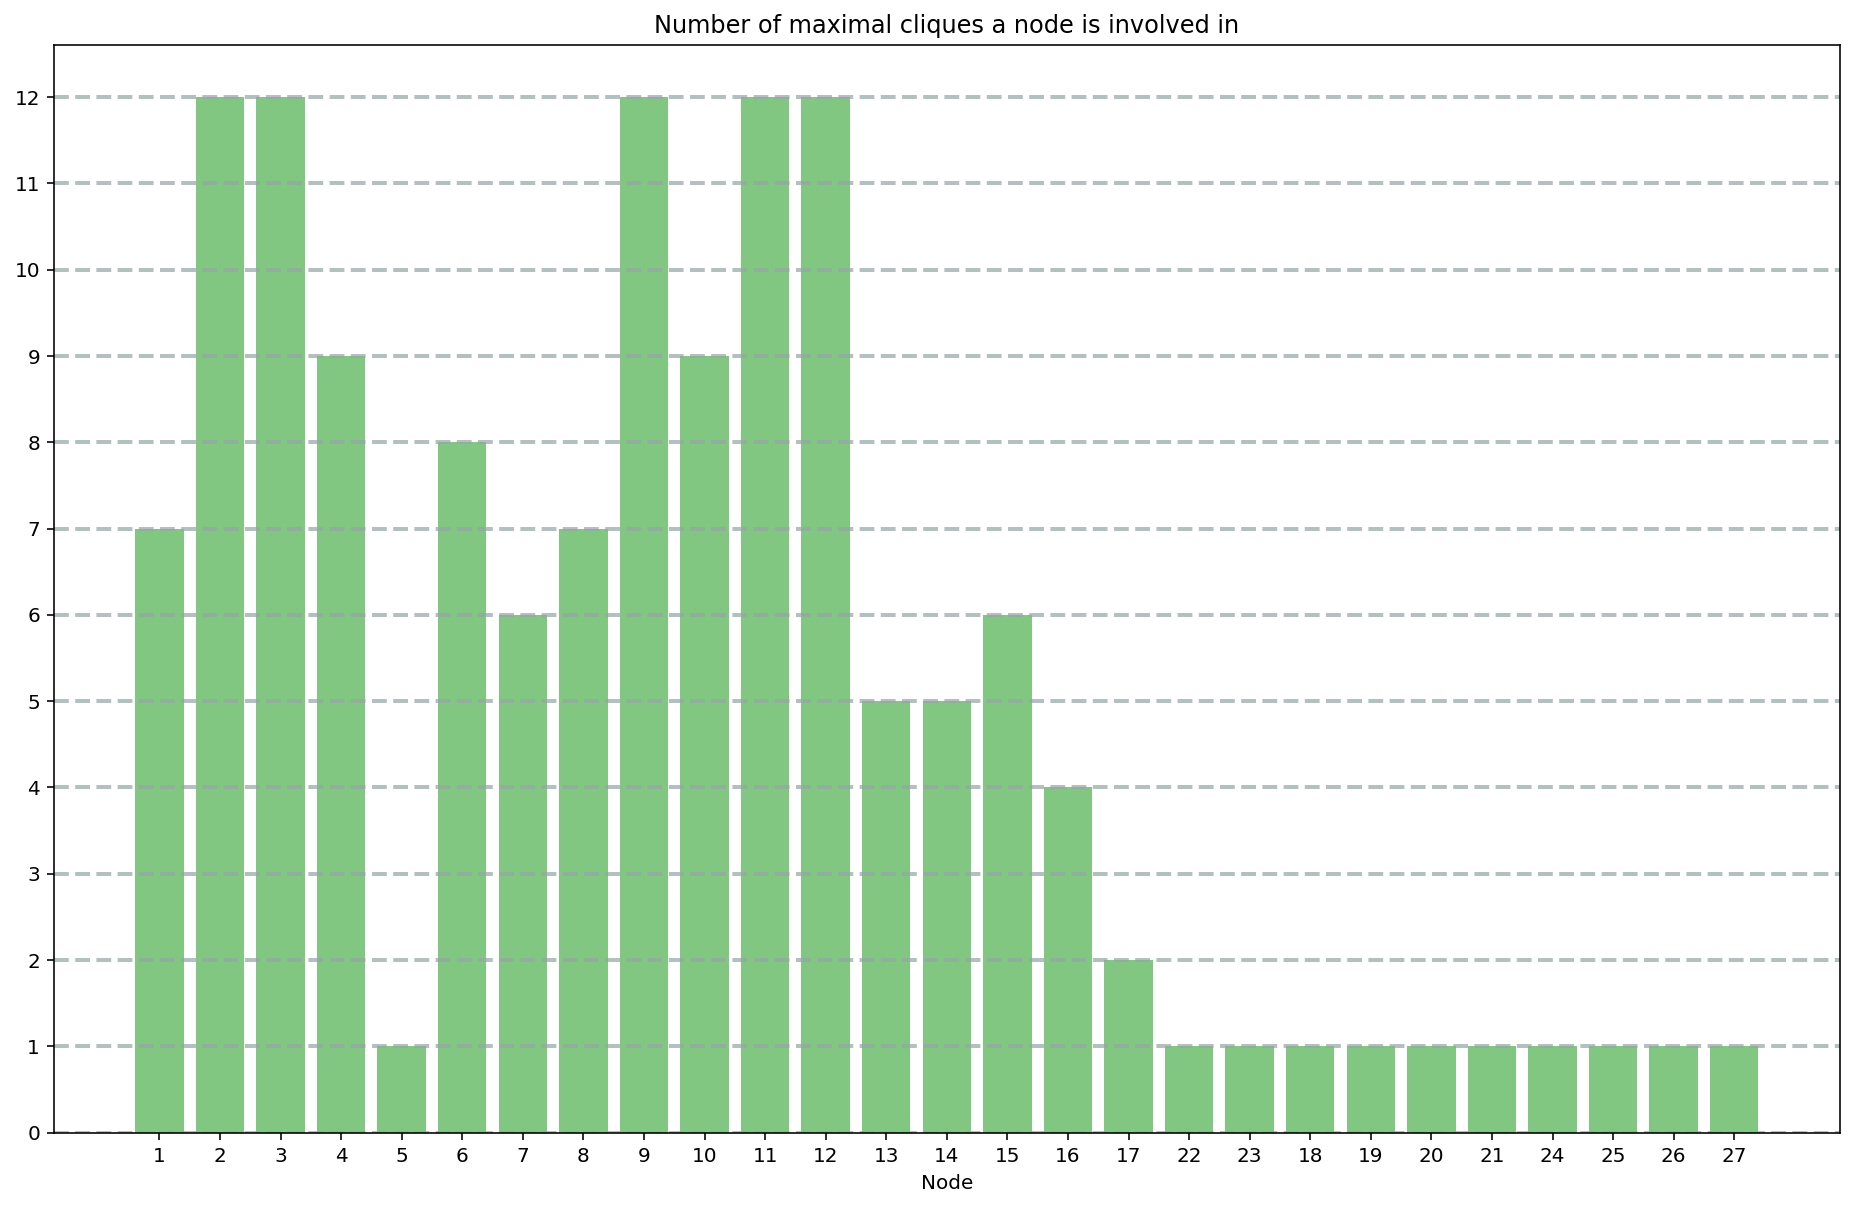

In [19]:
data = nx.number_of_cliques(Gzebras).values()
labels = Gzebras.nodes()
plt.xticks(range(len(data)), labels)
plt.yticks(np.arange(0, 13, step=1))
plt.xlabel('Node')
plt.title('Number of maximal cliques a node is involved in')
plt.bar(range(len(data)), data , color='#81c781') 
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

<p>
As we can see more than half of the zebra individuals are involved in many cliques, but some are involved in just one.
Hence, we can make the hypothesis that Grevy's zebra are quite sociable animals, but some of them might be more selective in their association choices.
</p>
<p>
We have already printed the neighbourhood of node 16, to finish we can print the maximal cliques that he is involved in.
</p>

In [20]:
nx.cliques_containing_node(Gzebras, nodes=16)

[[14, 16], [16, 19, 20, 21], [16, 17, 18], [16, 10]]

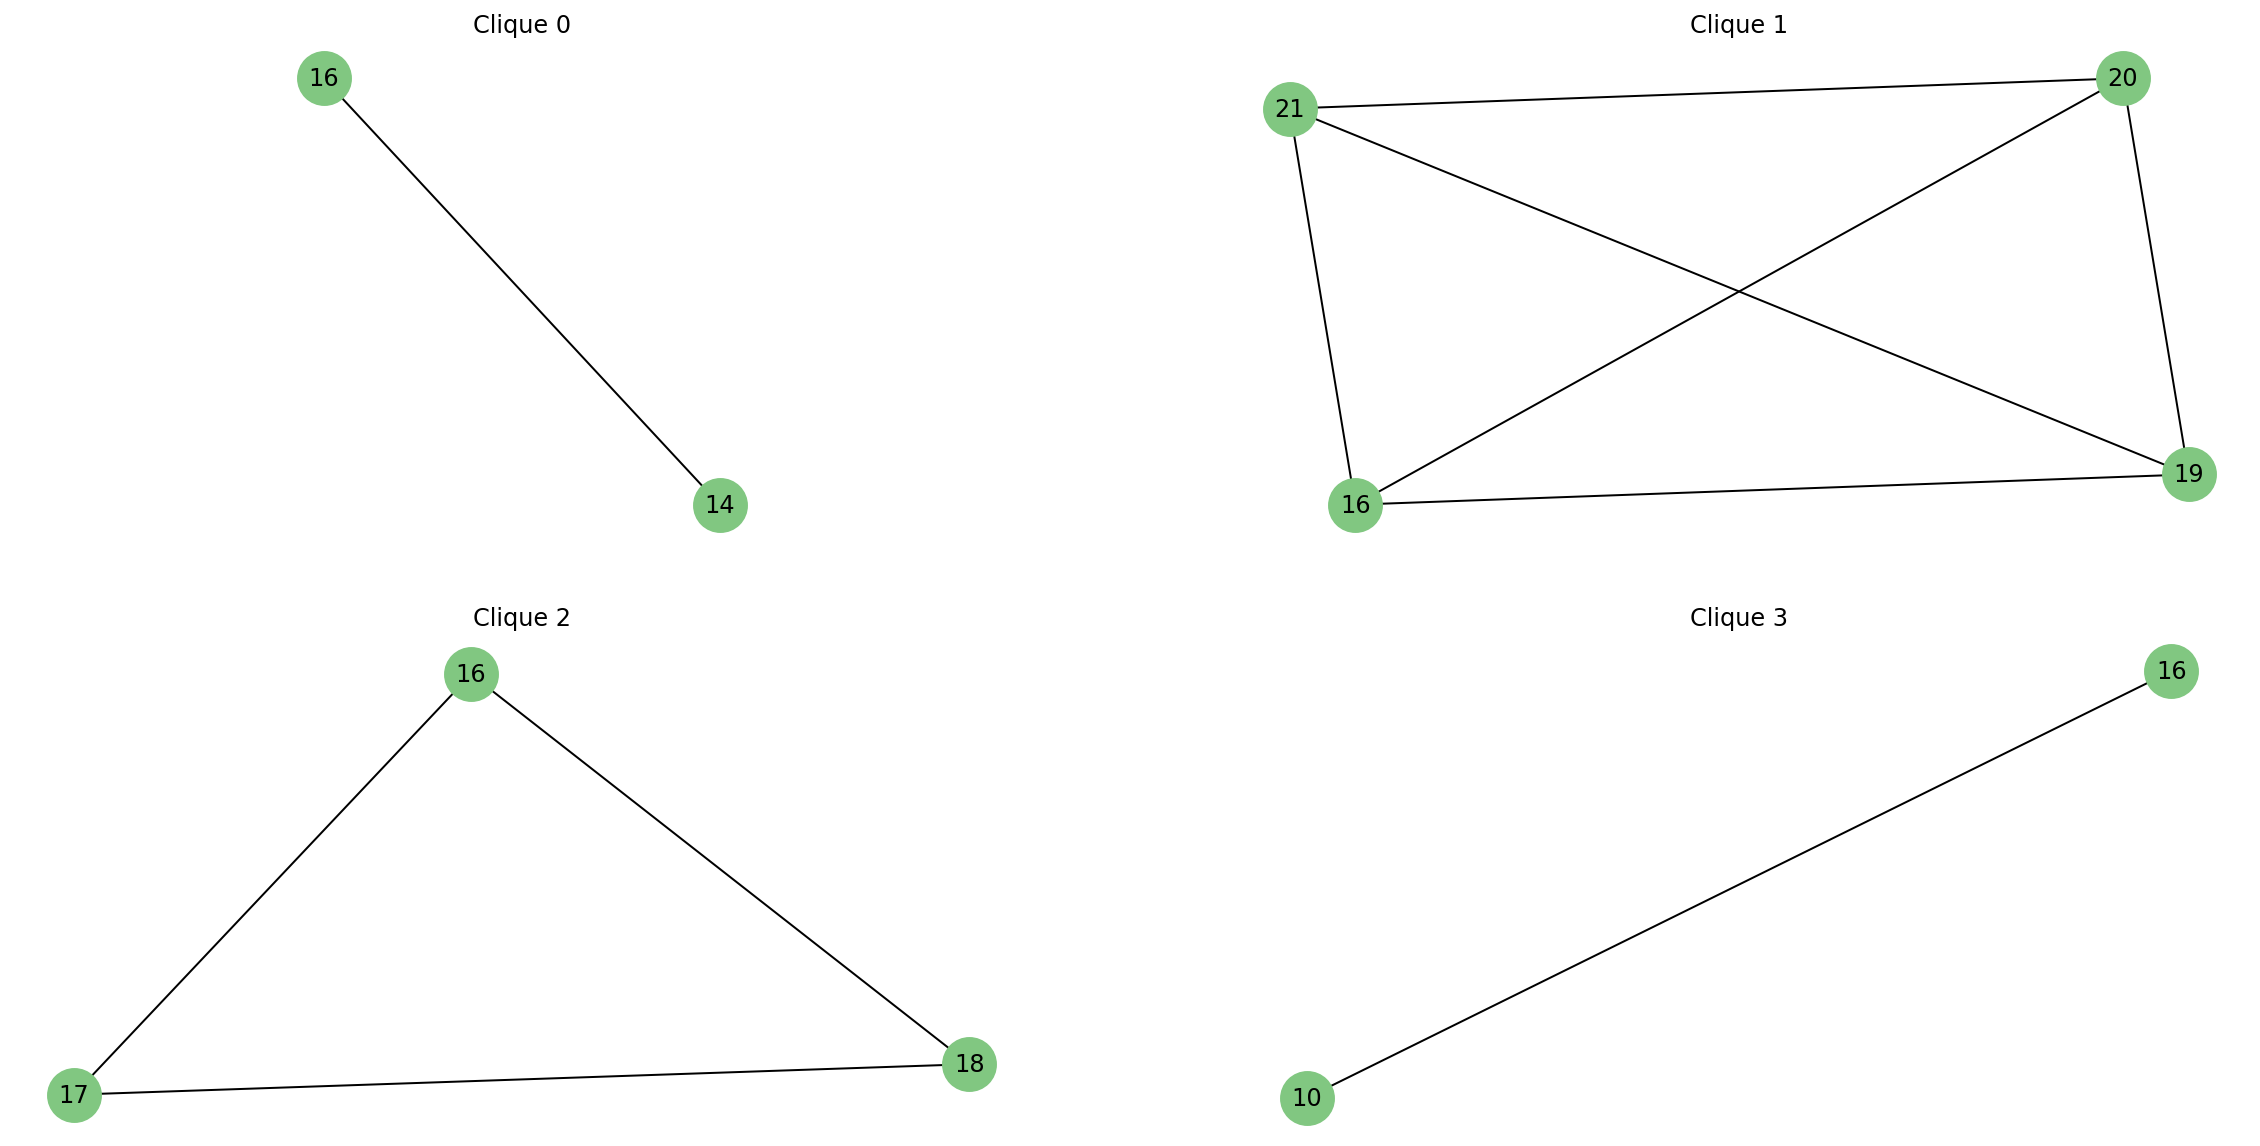

In [21]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
nx.draw(Gzebras.subgraph(list(nx.cliques_containing_node(Gzebras, nodes=16))[0]) , with_labels=True , node_color="#81c781" , node_size=700)
plt.title('Clique 0')

plt.subplot(2, 2, 2)
nx.draw(Gzebras.subgraph(list(nx.cliques_containing_node(Gzebras, nodes=16))[1]) , with_labels=True , node_color="#81c781" , node_size=700)
plt.title('Clique 1')

plt.subplot(2, 2, 3)
nx.draw(Gzebras.subgraph(list(nx.cliques_containing_node(Gzebras, nodes=16))[2]) , with_labels=True , node_color="#81c781" , node_size=700)
plt.title('Clique 2')

plt.subplot(2, 2, 4)
nx.draw(Gzebras.subgraph(list(nx.cliques_containing_node(Gzebras, nodes=16))[3]) , with_labels=True , node_color="#81c781" , node_size=700)
plt.title('Clique 3')

plt.show()

<br><a href="http://konect.uni-koblenz.de/networks/ucidata-zachary"><h1>A case study: Zachary's Karate Club</h1></a>

Zachary Karate Club is a well known social network, representing the interactions between members of a university karate club. It was described in the paper "An Information Flow Model for Conflict and Fission in Small Groups" by Wayne W. Zachary.
Each node represents a member of the club, and each edge represents a tie (based on interactions they made outside of the club) between two members of the club.

In [22]:
zkcdf = pd.read_csv('data/ucidata-zachary/out.ucidata-zachary', skiprows=2, header=None, sep=' ')
zkcdf.columns = ['member1', 'member2']
ZKCG = nx.from_pandas_edgelist(zkcdf, source='member1', target='member2')
print(nx.info(ZKCG))

Name: 
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


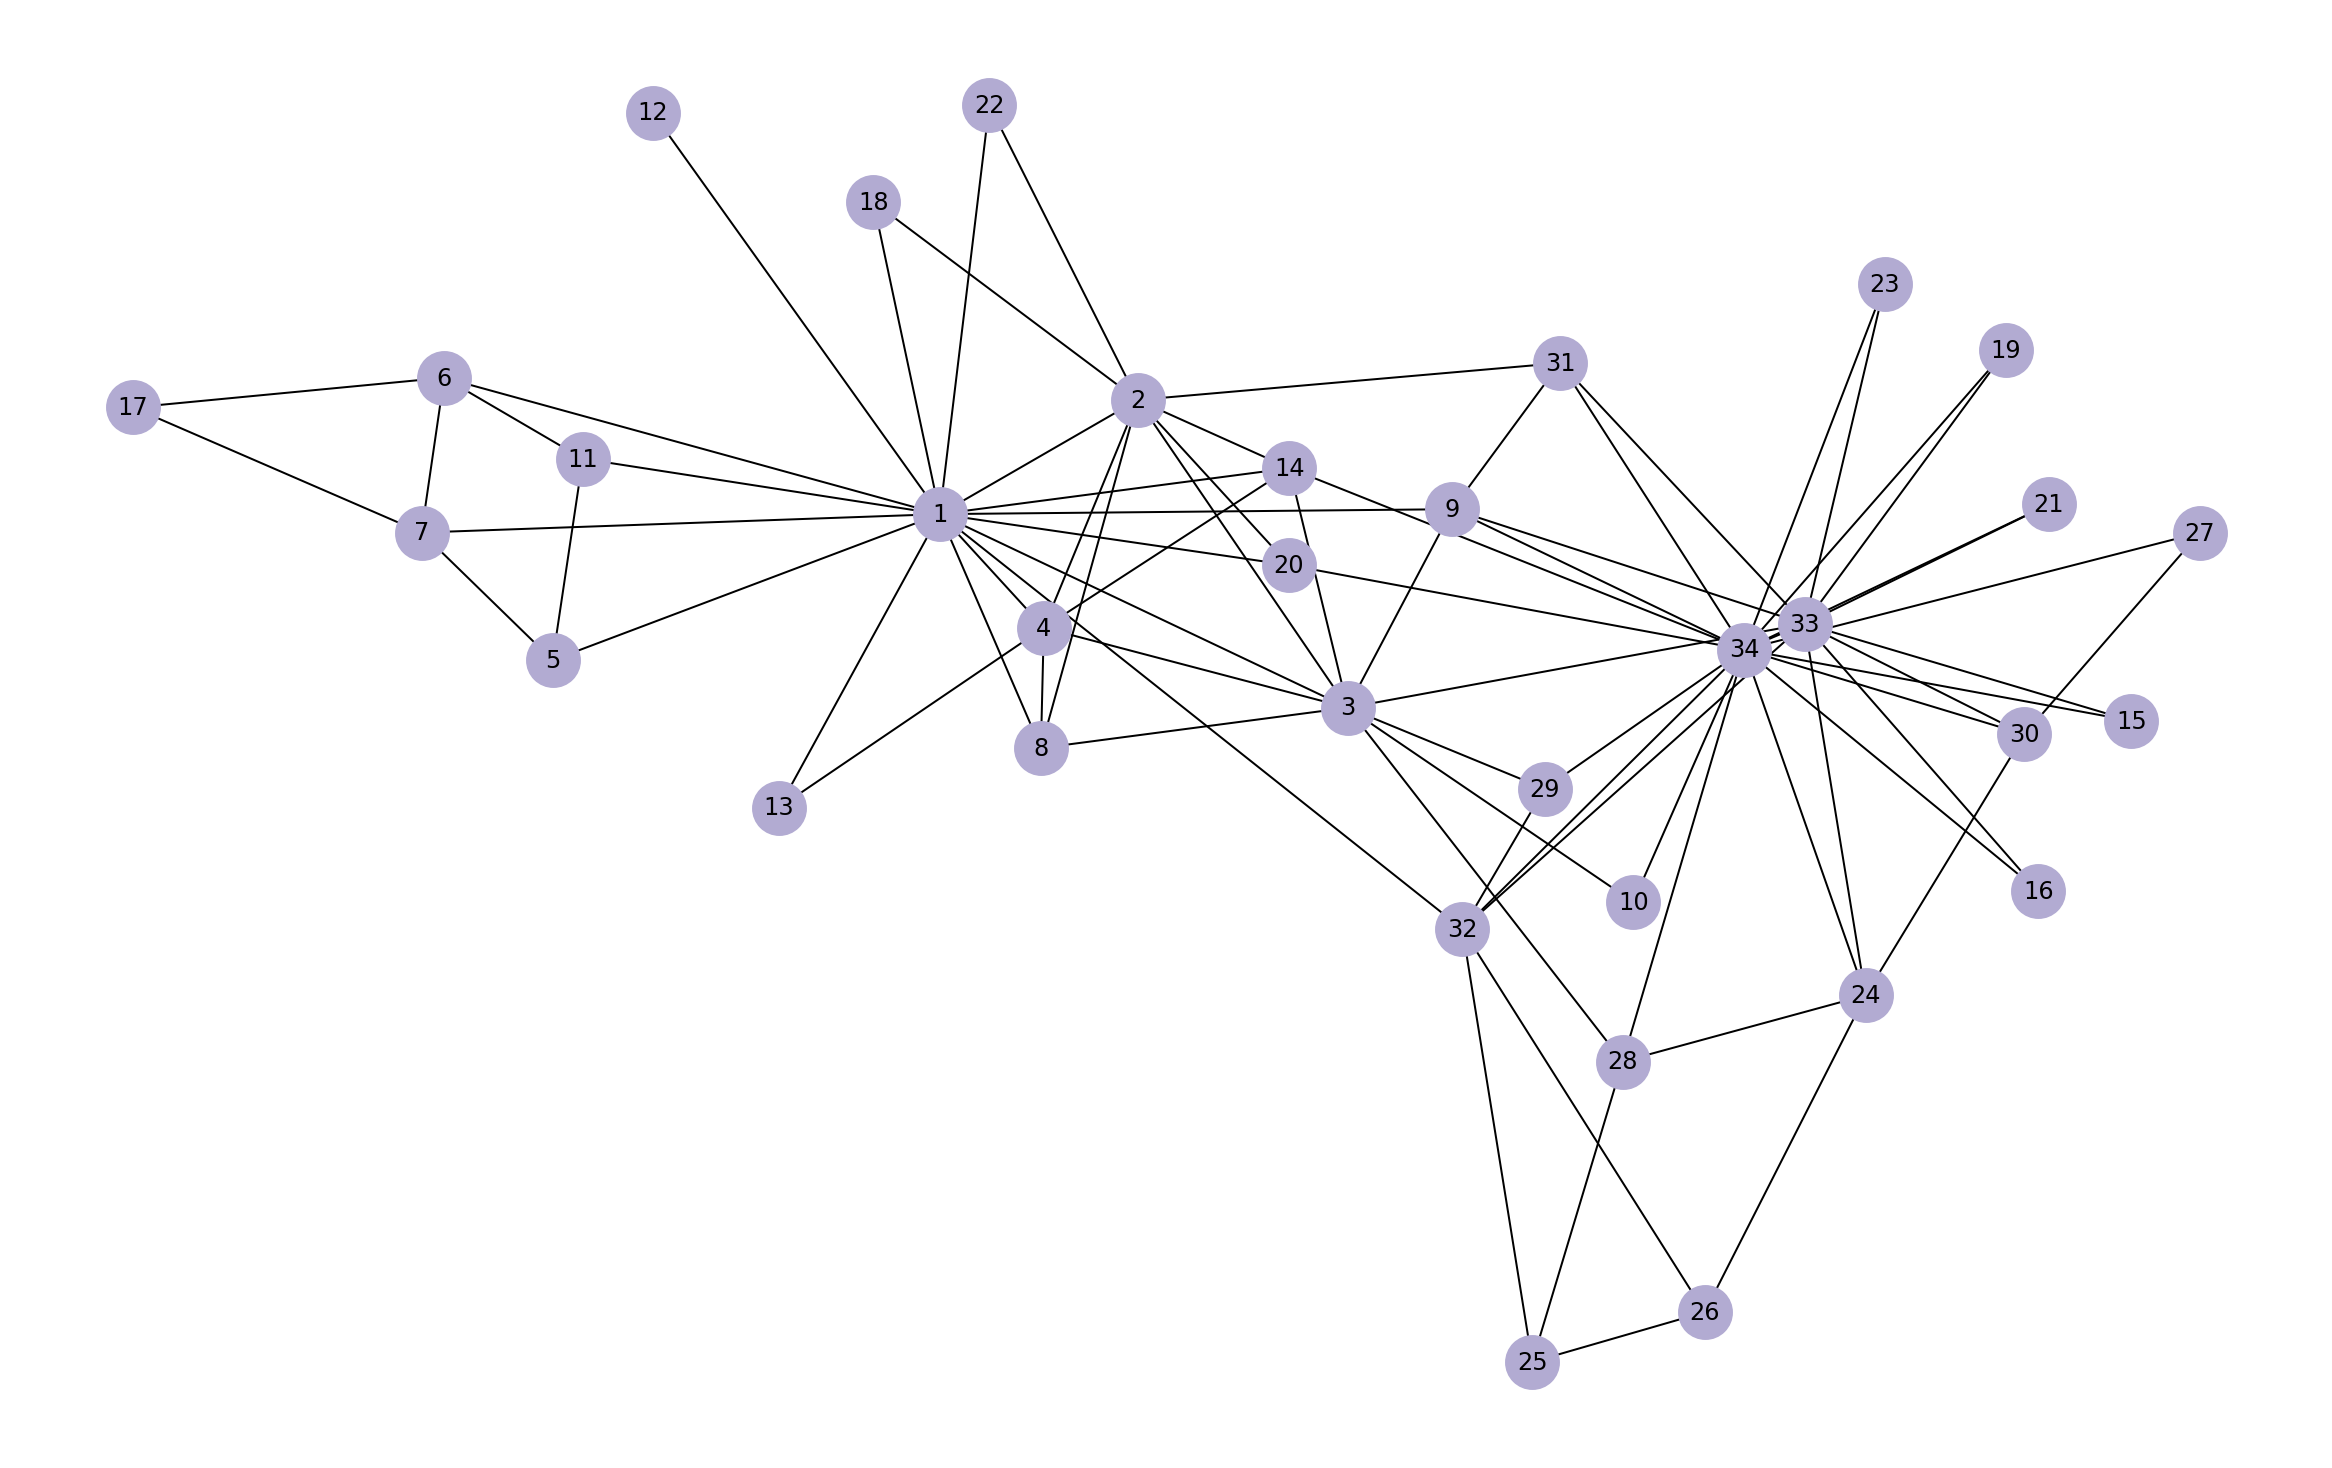

In [23]:
plt.rcParams["figure.figsize"] = (16,10)
nx.draw(ZKCG , with_labels=True , node_color='#b2abd2' , node_size=700)

Looking at this plot the suspicion arises that there might be some communities in the network.
That is made even clearer by the use of an <code>ArcPlot</code>

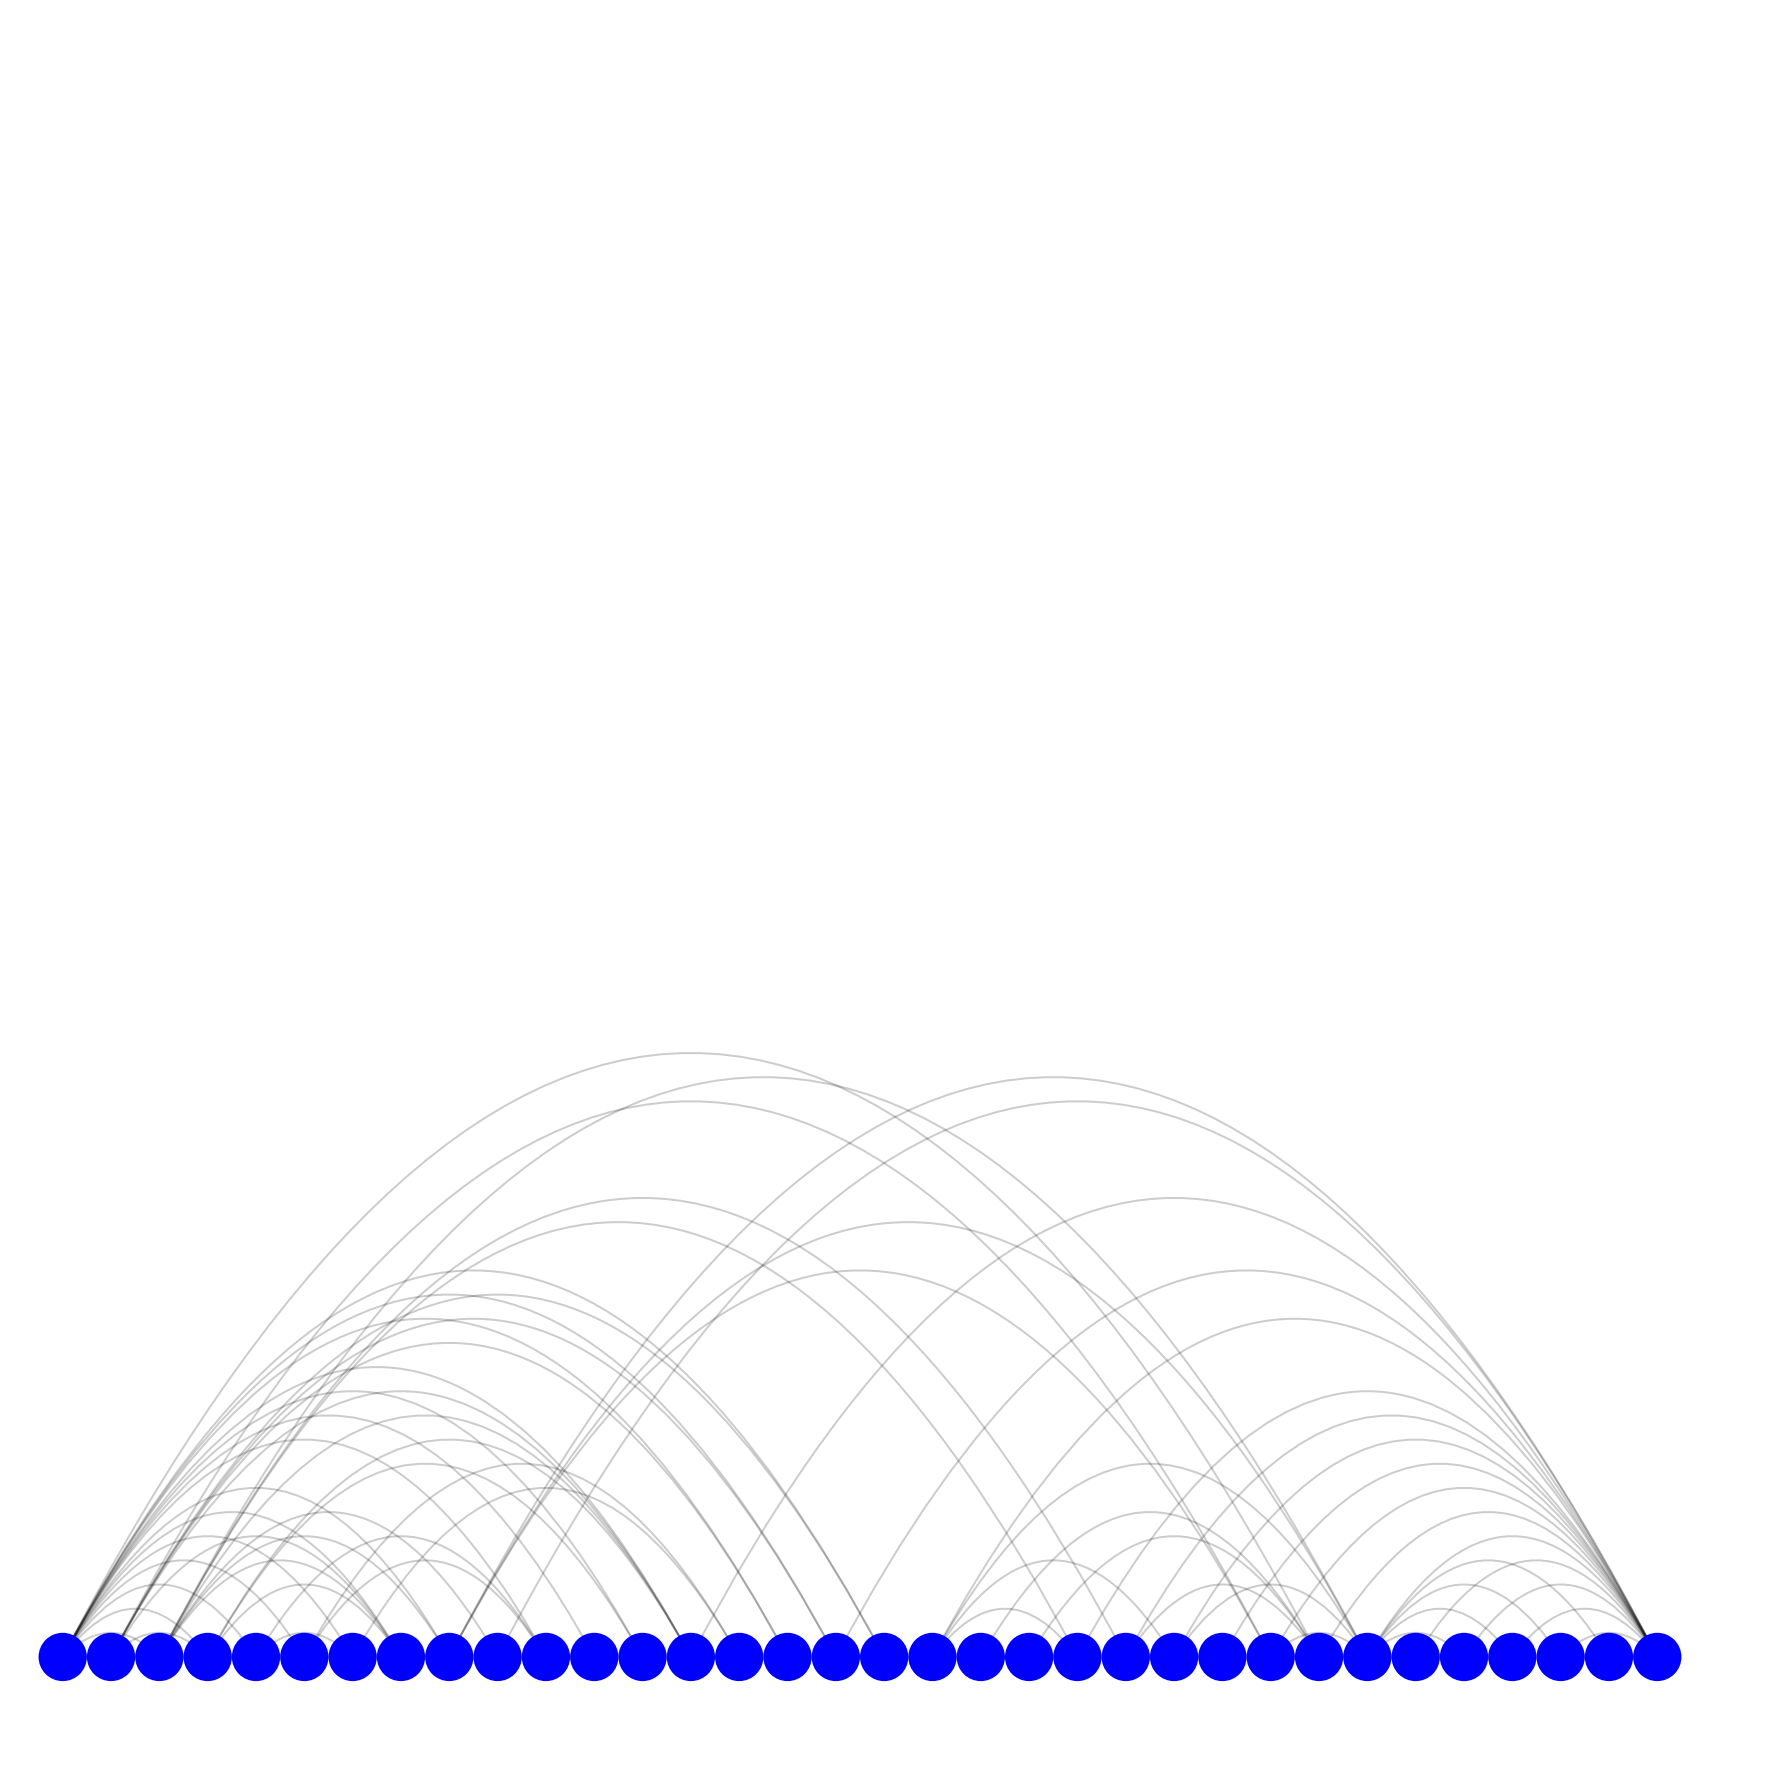

In [24]:
a = ArcPlot(ZKCG , figsize = (16,16))
a.draw()

In order to verify our suspicion, we will use the Louvain community detection algorithm to find the communities in our graph.

In [25]:
partition = community.best_partition(ZKCG)
partition

{1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 1,
 6: 1,
 7: 1,
 8: 0,
 9: 2,
 10: 0,
 11: 1,
 12: 0,
 13: 0,
 14: 0,
 17: 1,
 18: 0,
 20: 0,
 22: 0,
 24: 3,
 26: 3,
 25: 3,
 28: 3,
 29: 3,
 30: 2,
 27: 2,
 31: 2,
 32: 3,
 33: 2,
 15: 2,
 16: 2,
 19: 2,
 21: 2,
 23: 2,
 34: 2}

As we can see the algorithm has found four different communities (0, 1, 2 and 3)

In [26]:
# create a subgraph for each partition
sub0 = []
for n in partition:
    if partition[n] == 0:
        sub0.append(n)
        
sub1 = []
for n in partition:
    if partition[n] == 1:
        sub1.append(n)
        
sub2 = []
for n in partition:
    if partition[n] == 2:
        sub2.append(n)
        
sub3 = []
for n in partition:
    if partition[n] == 3:
        sub3.append(n)

# use them to assign a 'subgraph' attribute to the nodes
commsubgraphs = [ZKCG.subgraph(sub0), ZKCG.subgraph(sub1), ZKCG.subgraph(sub2), ZKCG.subgraph(sub3)]

for i, g in enumerate(commsubgraphs):
    for n in g.nodes():
        ZKCG.nodes[n]['subgraph'] = i
        
list(ZKCG.nodes(data=True))[8:19]

[(9, {'subgraph': 2}),
 (10, {'subgraph': 0}),
 (11, {'subgraph': 1}),
 (12, {'subgraph': 0}),
 (13, {'subgraph': 0}),
 (14, {'subgraph': 0}),
 (17, {'subgraph': 1}),
 (18, {'subgraph': 0}),
 (20, {'subgraph': 0}),
 (22, {'subgraph': 0}),
 (24, {'subgraph': 3})]

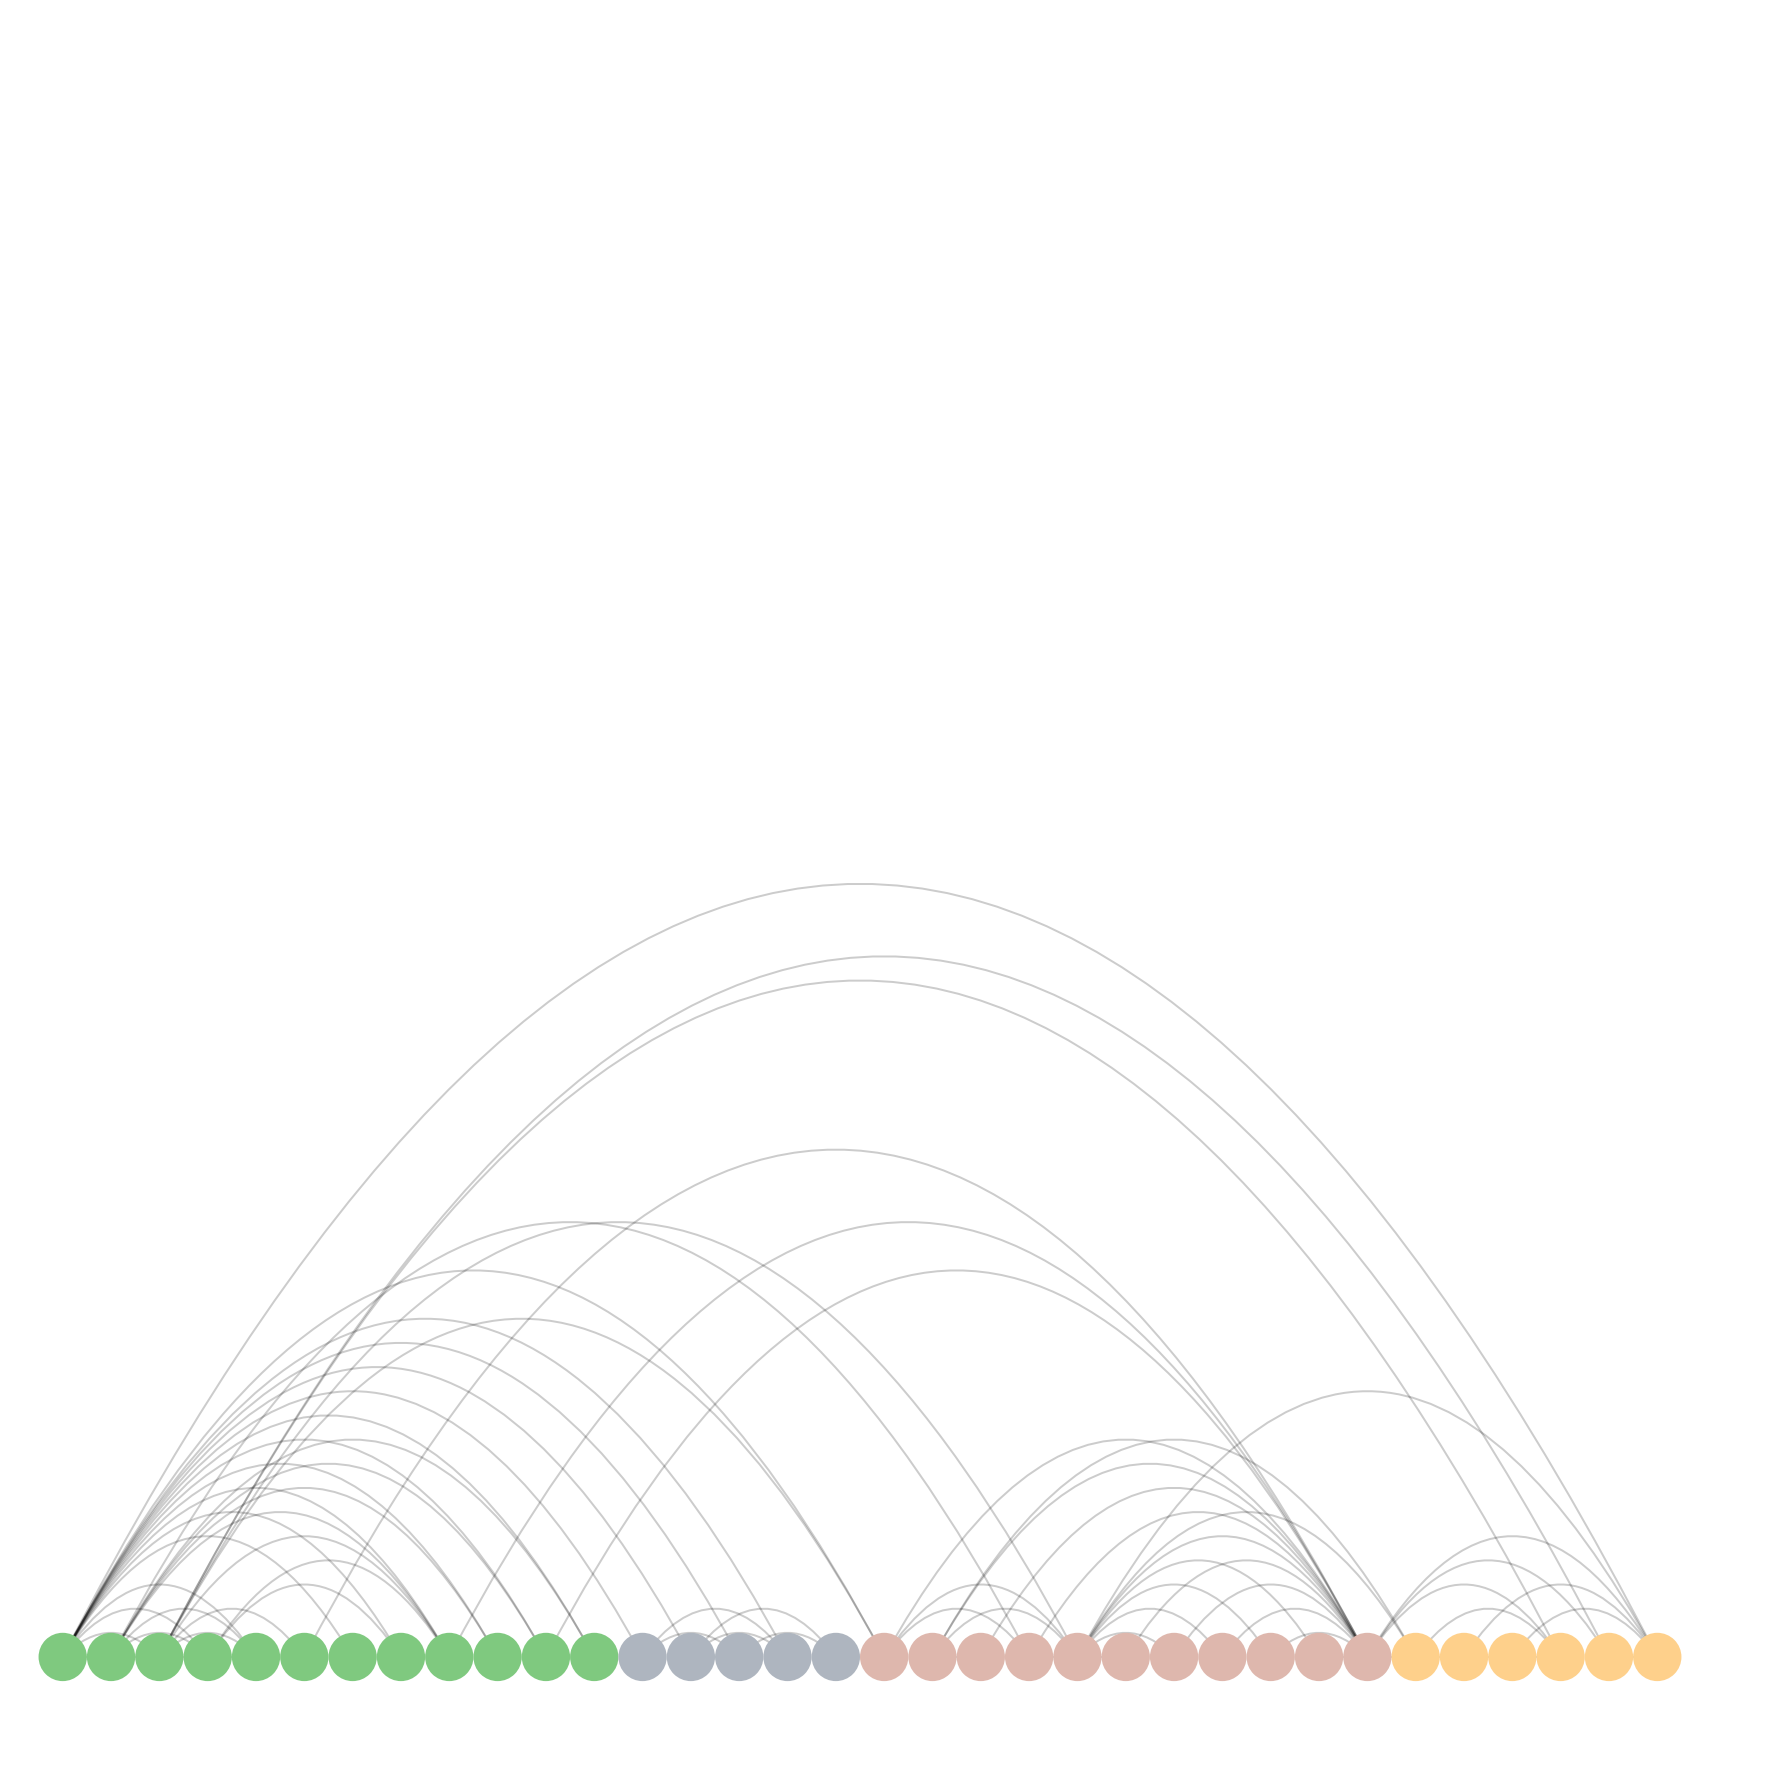

In [27]:
a = ArcPlot(ZKCG, node_color='subgraph', node_order='subgraph' , figsize = (16,16))
a.draw()

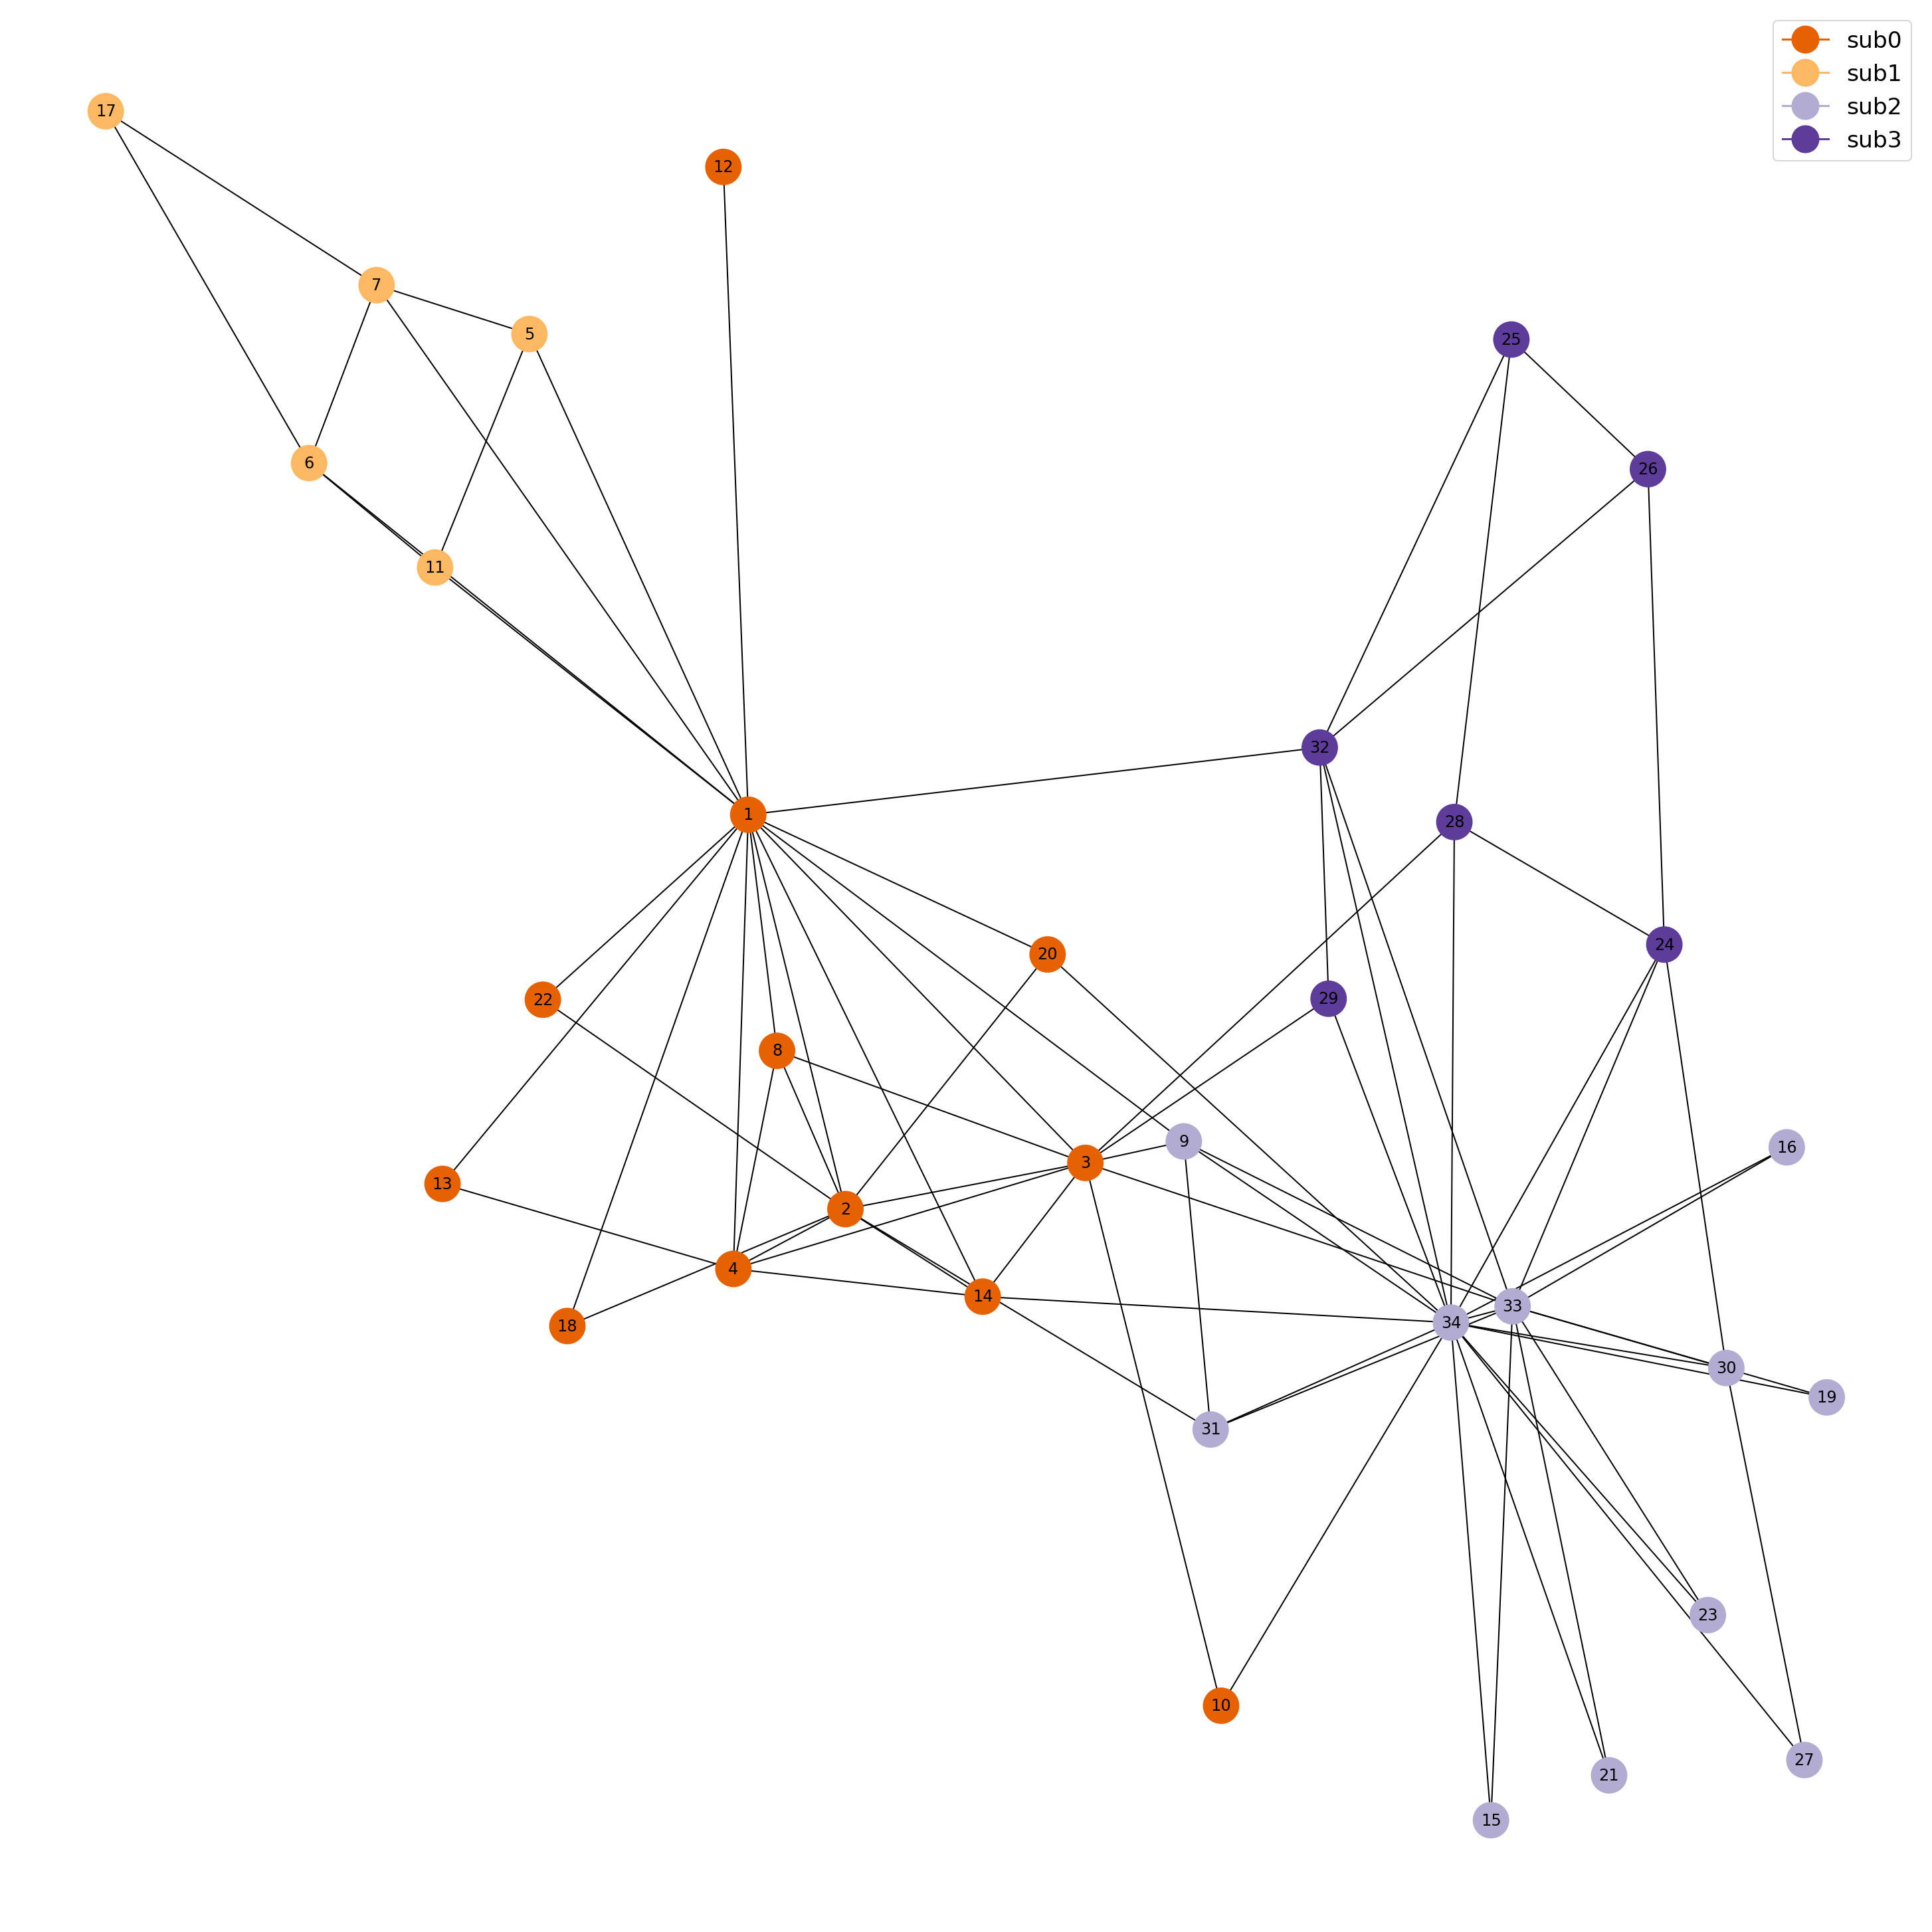

In [48]:
Zcolor_map = []
for node in ZKCG:
    if ZKCG.nodes[node]['subgraph'] == 0:
        Zcolor_map.append('#e66101')
    else:
        if ZKCG.nodes[node]['subgraph'] == 1:
            Zcolor_map.append('#fdb863')
        else:
            if ZKCG.nodes[node]['subgraph'] == 2:
                Zcolor_map.append('#b2abd2')
            else:
                Zcolor_map.append('#5e3c99')

# drawing with a spring layout can help visualize the communities
nx.draw_spring(ZKCG, node_color=Zcolor_map, with_labels=True , node_size=700)

legend_elements = [Line2D([0], [0], marker='o', color='#e66101', label='sub0', markerfacecolor='#e66101', markersize=20),
                   Line2D([0], [0], marker='o', color='#fdb863', label='sub1', markerfacecolor='#fdb863', markersize=20),
                   Line2D([0], [0], marker='o', color='#b2abd2', label='sub2', markerfacecolor='#b2abd2', markersize=20),
                   Line2D([0], [0], marker='o', color='#5e3c99', label='sub3', markerfacecolor='#5e3c99', markersize=20)
                  ]

plt.legend(handles=legend_elements , fontsize='xx-large')
plt.show()

By plotting the graph with the four communities found, we realize that the groups 0 and 1 and the groups 2 and 3 are strongly connected between them, but they don't have strong connections with the other 2.
Hence, since we are interested in splitting the graph in two, we can have a simpler visualization by putting them together in one community.

In [29]:
com0 = []
for n in partition:
    if partition[n] == 0 or partition[n] == 1:
        com0.append(n)
        
com1 = []
for n in partition:
    if partition[n] == 2 or partition[n] == 3:
        com1.append(n)

        
commsubgraphs2 = [ZKCG.subgraph(com0), ZKCG.subgraph(com1)]

ZKCG2 = ZKCG.copy()

for i, g in enumerate(commsubgraphs2):
    for n in g.nodes():
        ZKCG2.nodes[n]['subgraph'] = i

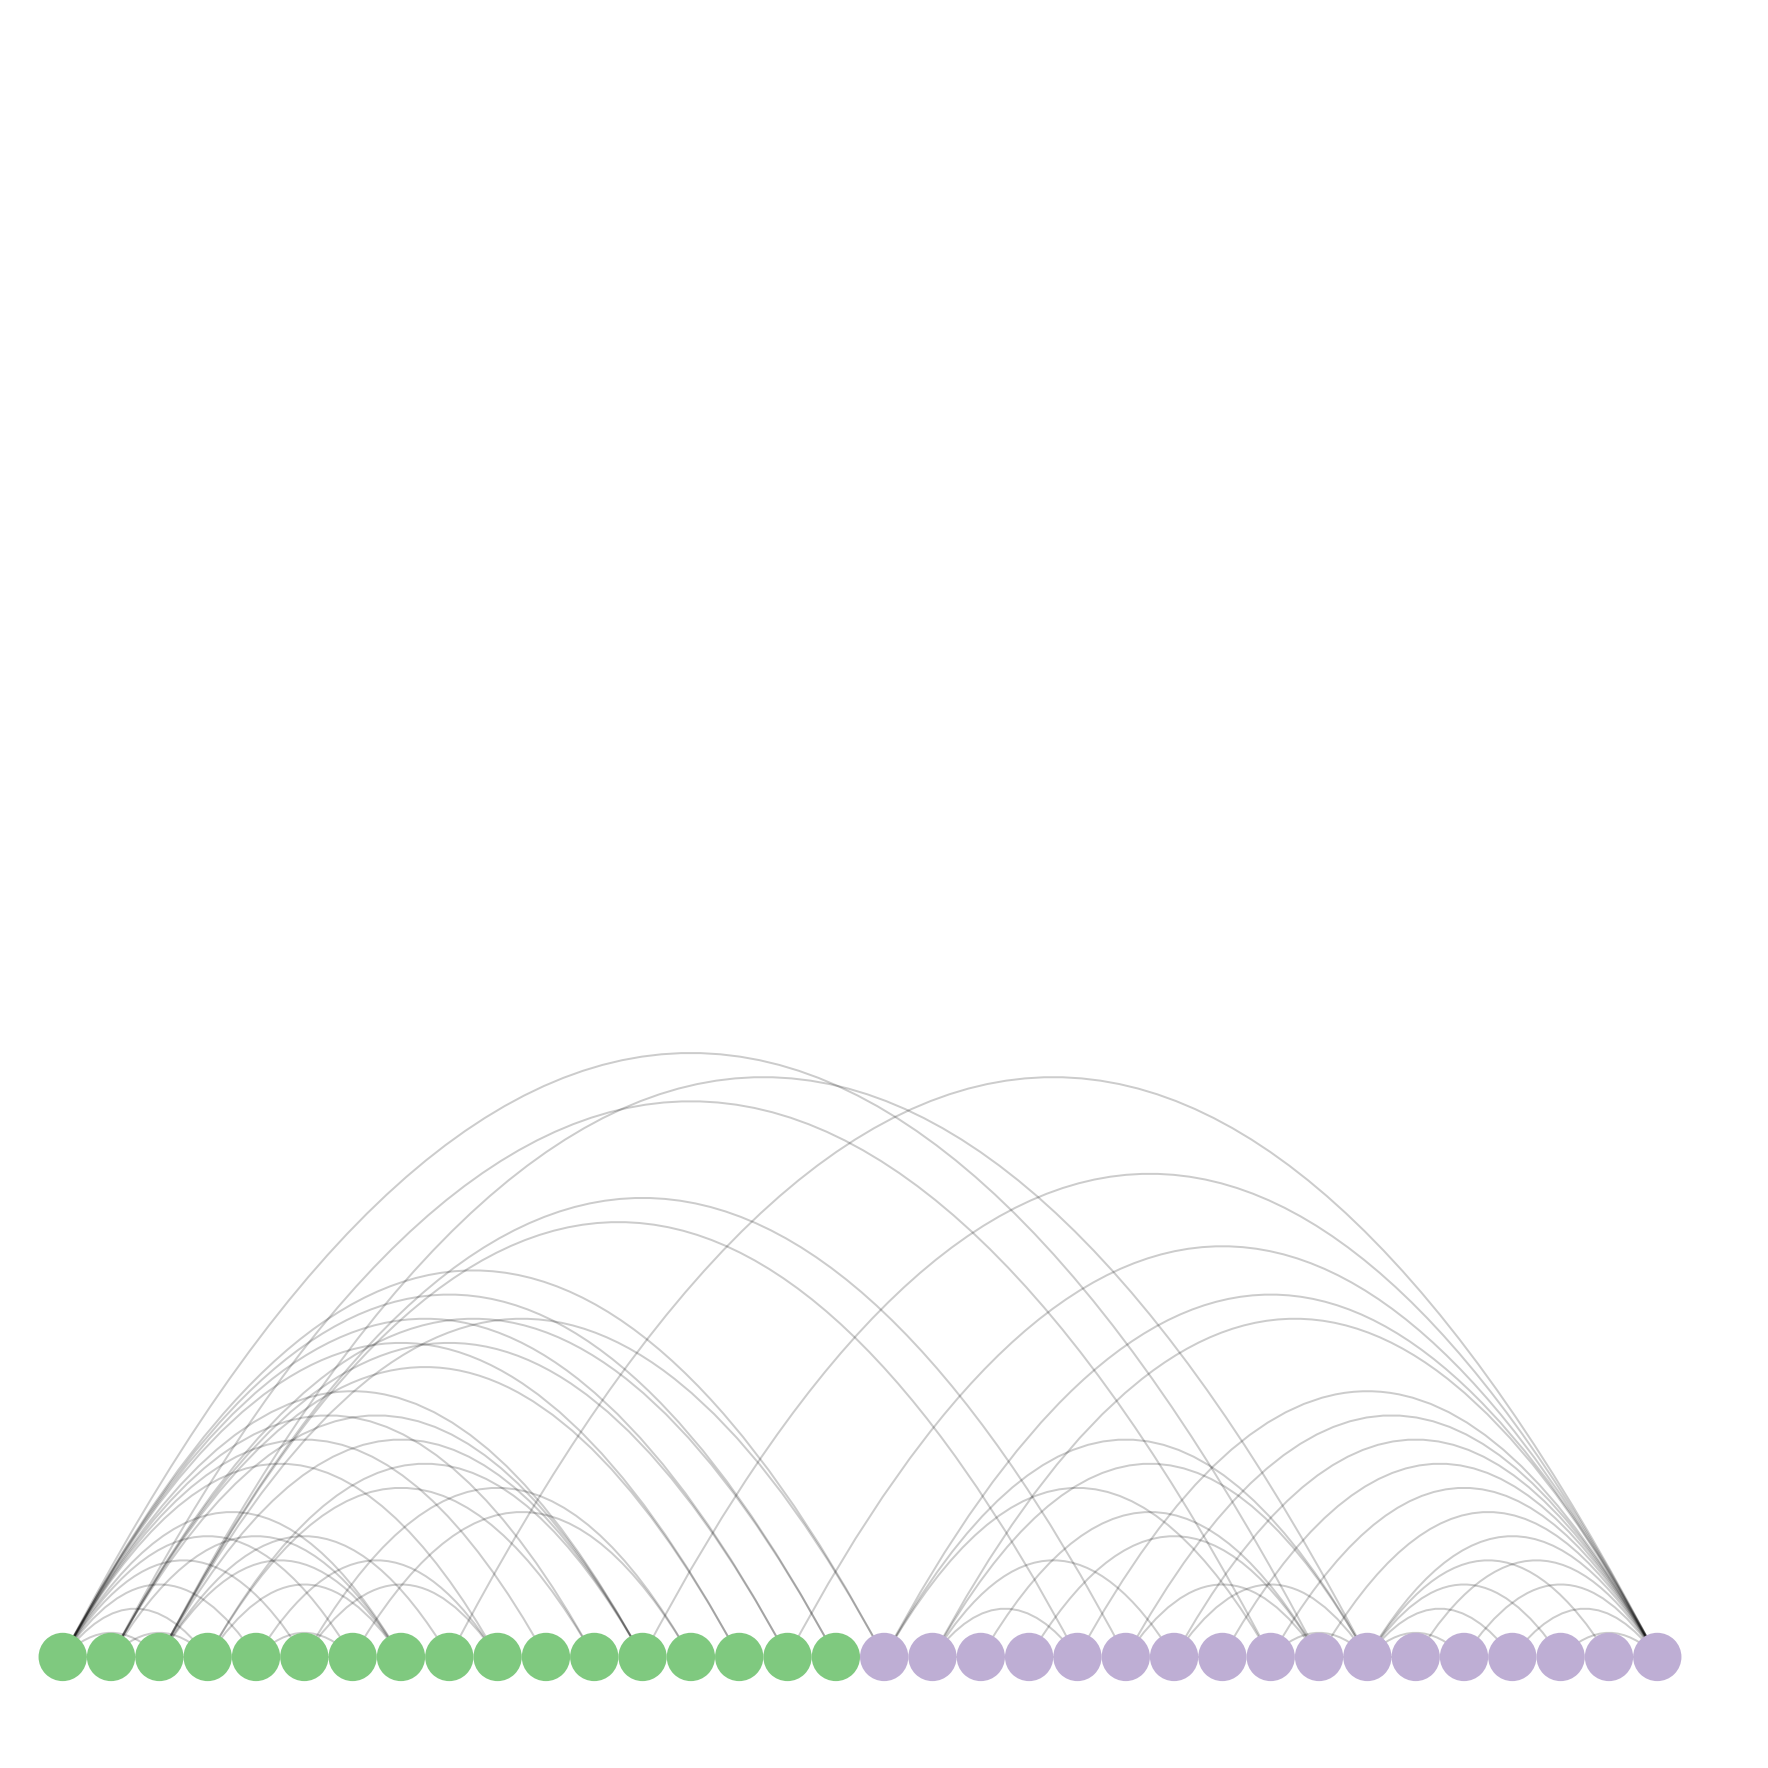

In [30]:
a = ArcPlot(ZKCG2, node_color='subgraph', node_order='subgraph' , figsize = (16,16))
a.draw()

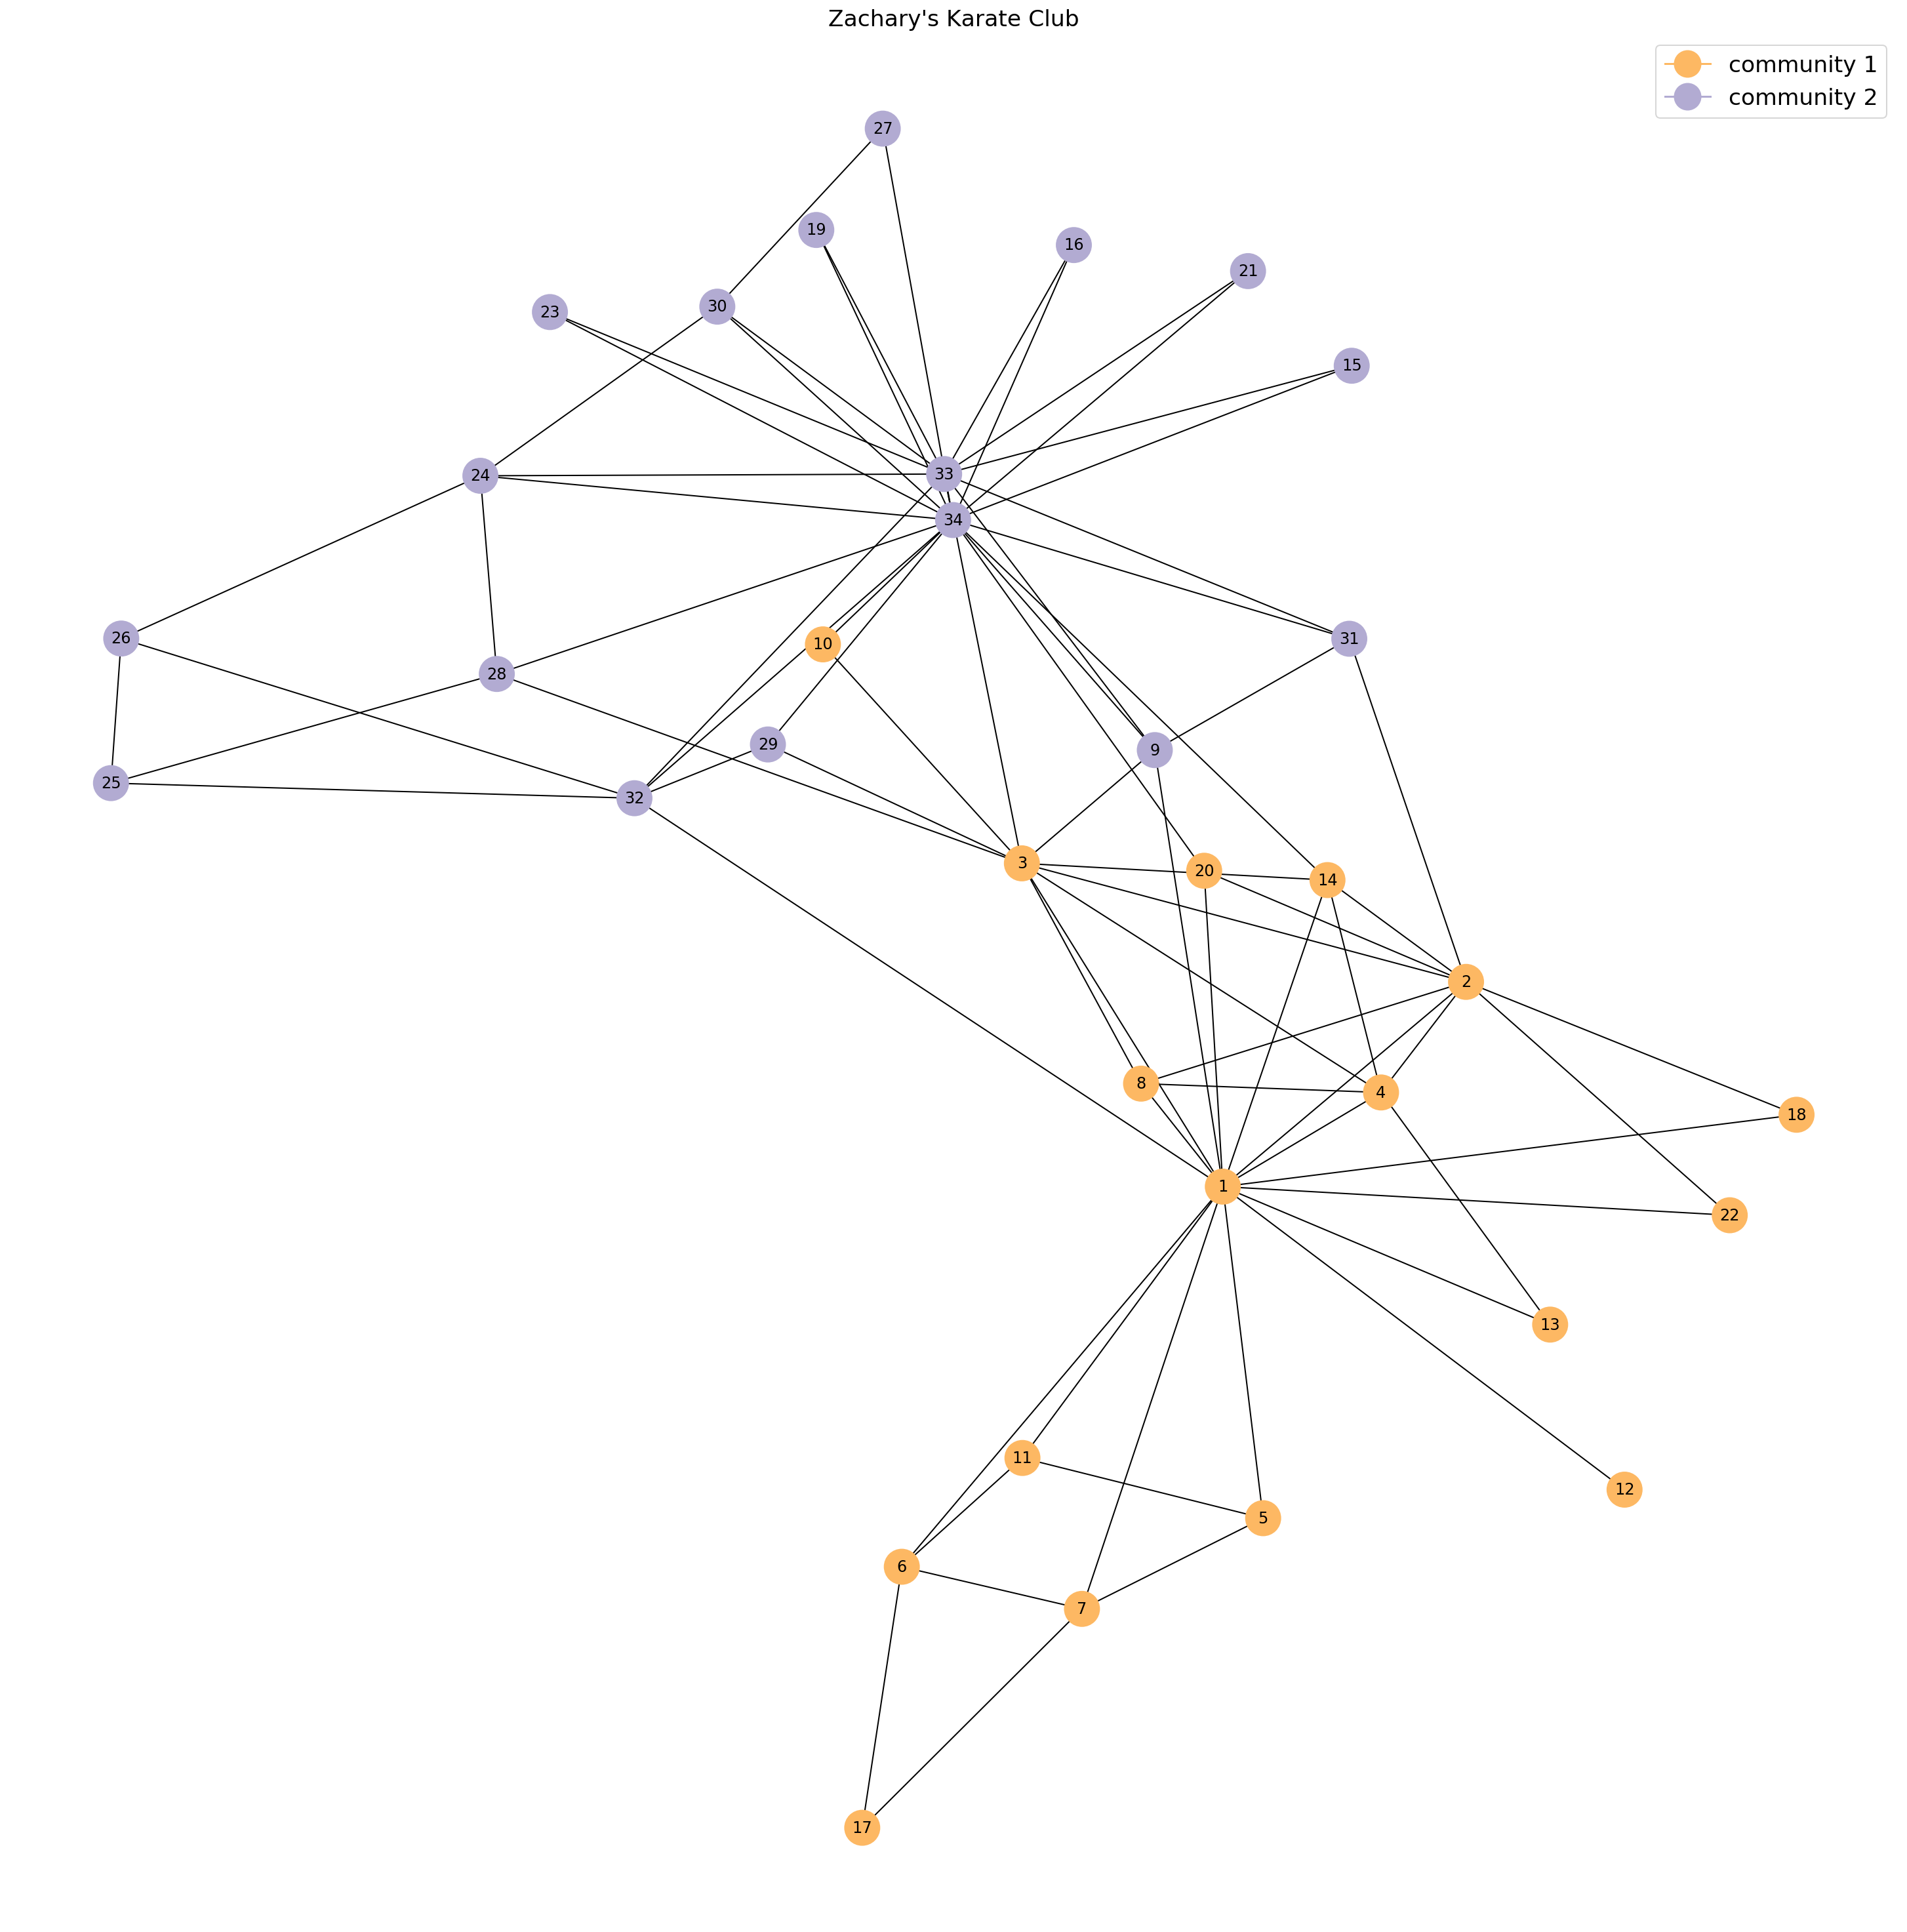

In [49]:
zcolor_map2 = []
for node in ZKCG2:
    if ZKCG2.nodes[node]['subgraph'] == 0:
        zcolor_map2.append('#fdb863')
    else: 
        zcolor_map2.append('#b2abd2')      

nx.draw_spring(ZKCG2, node_color=zcolor_map2, with_labels=True , node_size=700)

legend_elements = [Line2D([0], [0], marker='o', color='#fdb863', label='community 1', markerfacecolor='#fdb863', markersize=20),
                   Line2D([0], [0], marker='o', color='#b2abd2', label='community 2', markerfacecolor='#b2abd2', markersize=20),
                  ]

plt.legend(handles=legend_elements , fontsize='xx-large')
plt.title("Zachary's Karate Club" , fontsize='xx-large')
plt.show()

We divided our graph into two communities. What about the interactions between them? To find out we can use an hiveplot

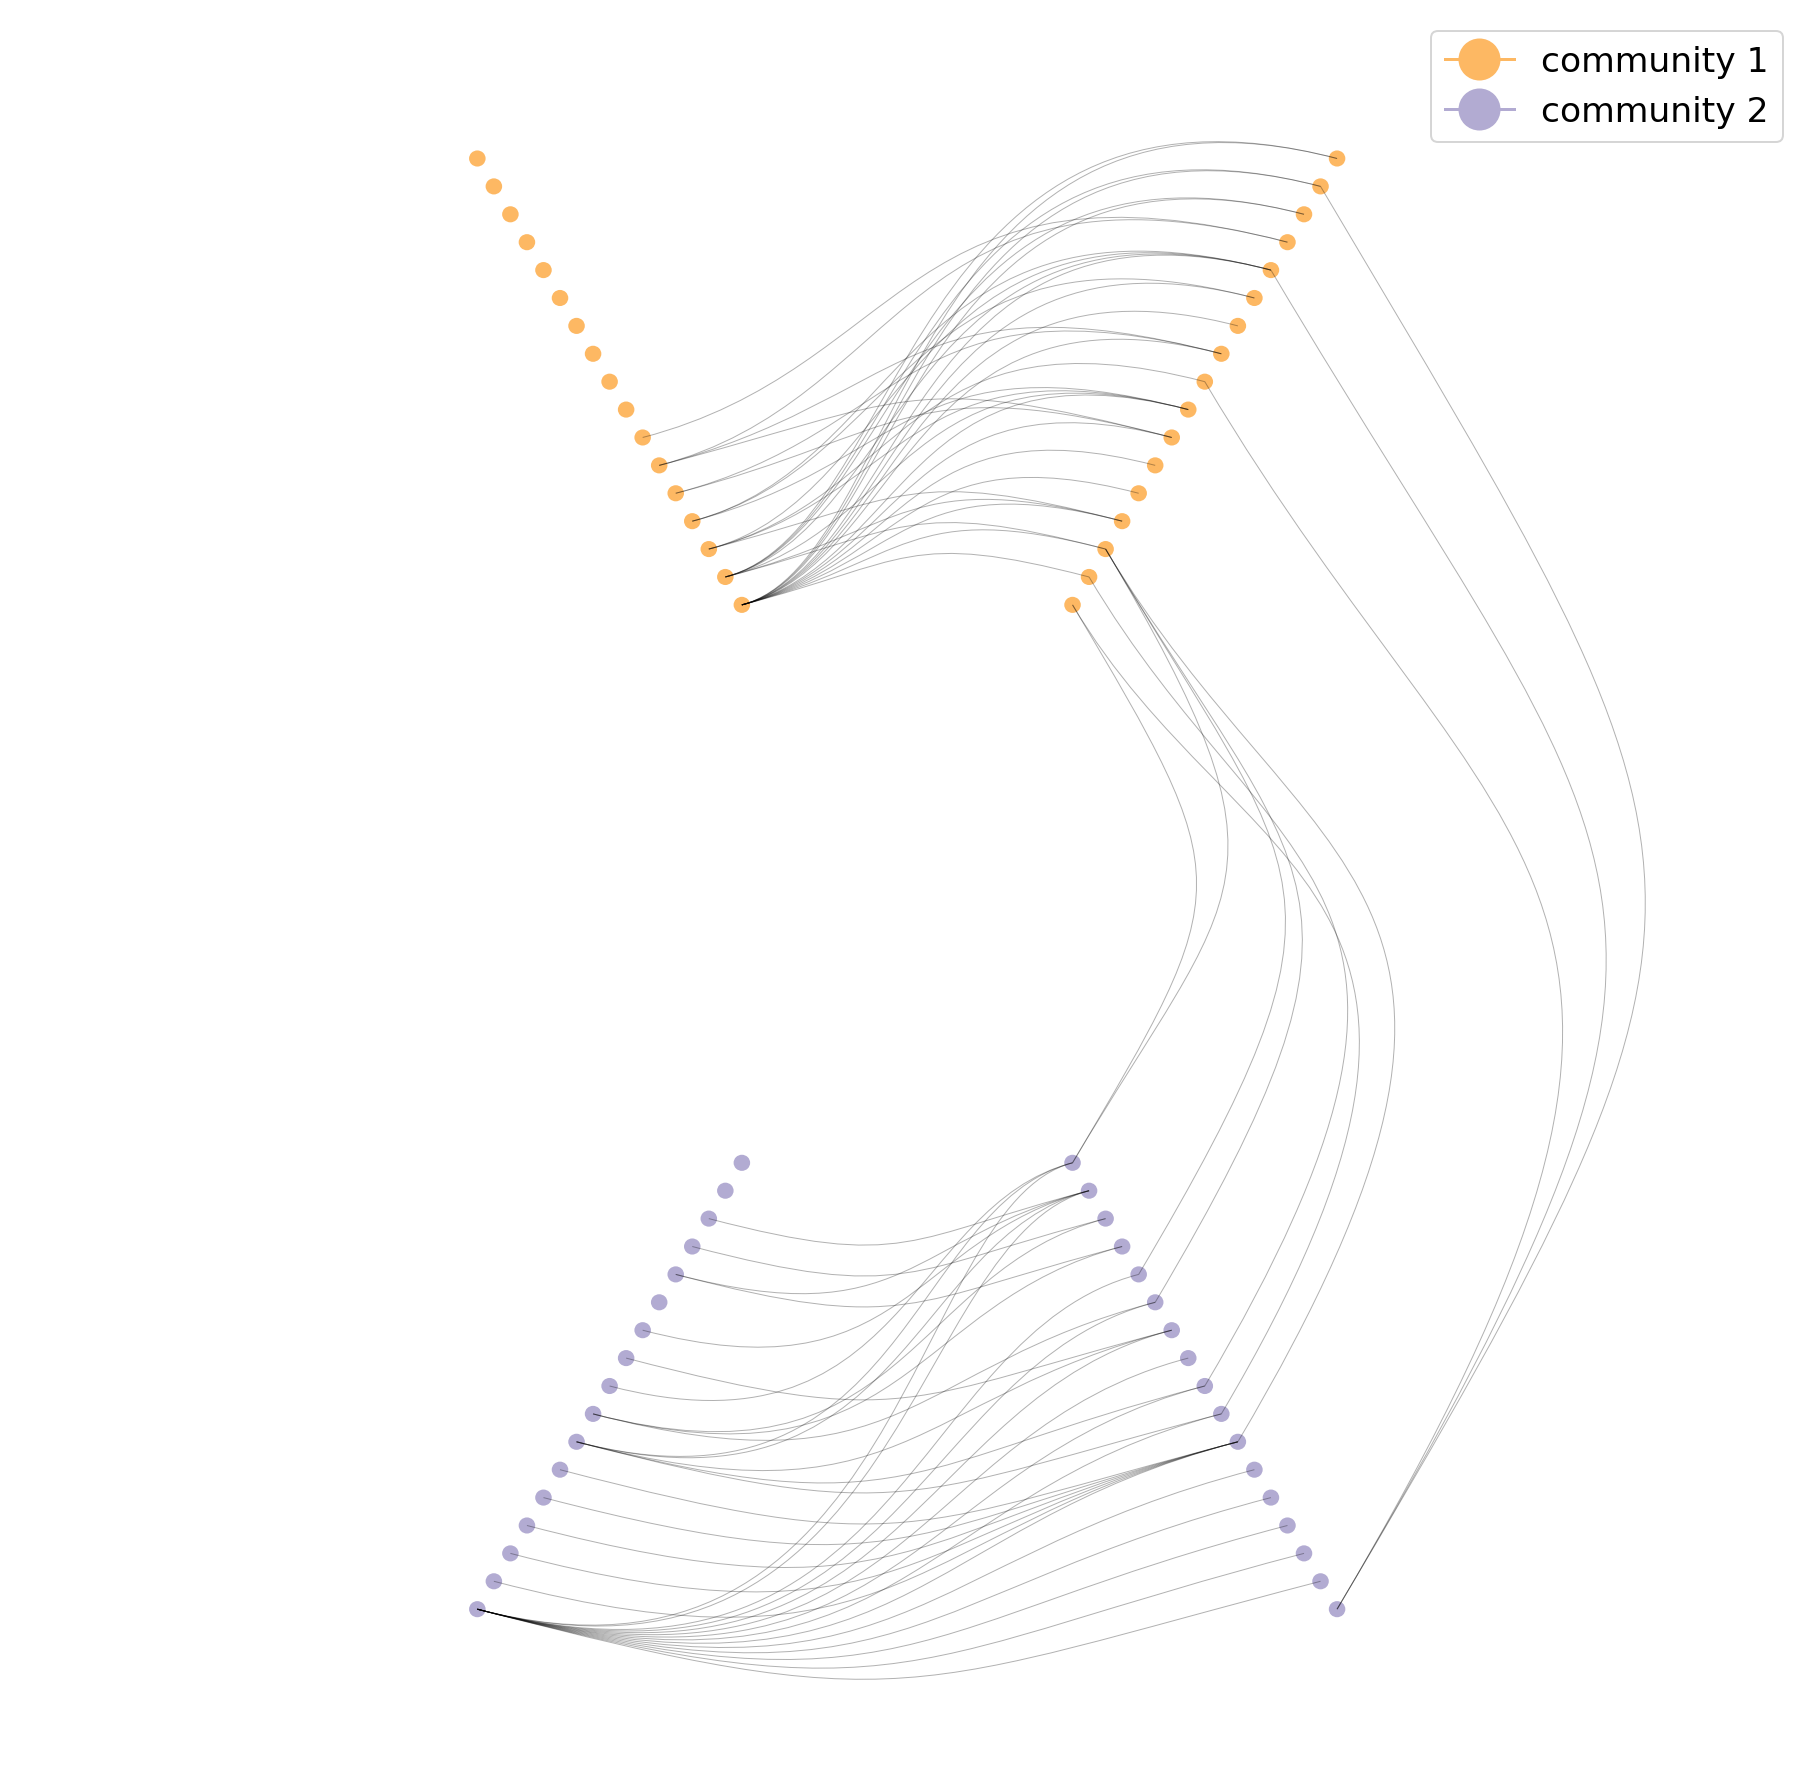

In [32]:
nodes = dict()
nodes['0'] = [n for n,d in ZKCG2.nodes(data=True) if d['subgraph'] == 0]
nodes['1'] = [n for n,d in ZKCG2.nodes(data=True) if d['subgraph'] == 1]

edges = dict()
edges['group1'] = ZKCG2.edges(data=True)

nodes_cmap = dict()
nodes_cmap['0'] = '#fdb863'
nodes_cmap['1'] = '#b2abd2'

edges_cmap = dict()
edges_cmap['group1'] = 'black'

fig = plt.figure(figsize=(16, 16))
h = HivePlot(nodes, edges, nodes_cmap, edges_cmap, scale=10 , fig=fig)
legend_elements = [Line2D([0], [0], marker='o', color='#fdb863', label='community 1', markerfacecolor='#fdb863', markersize=20),
                   Line2D([0], [0], marker='o', color='#b2abd2', label='community 2', markerfacecolor='#b2abd2', markersize=20),
                  ]

plt.legend(handles=legend_elements , fontsize='xx-large')
h.draw()

As we can see, members of the two communities tend to have interactions only inside their community.


Another hypothesis that we can make by looking at this graph is that the two communities seem to have each a central figure, who has lots of interactions with the members of his community.

In order to verify this hypothesis, we can find the two nodes who have the highest degree centrality in each community.

In [33]:
degree_centralities_com0 = nx.degree_centrality(ZKCG.subgraph(com0))
degree_centralities_com0

{1: 0.875,
 2: 0.5,
 3: 0.375,
 4: 0.375,
 5: 0.1875,
 6: 0.25,
 7: 0.25,
 8: 0.25,
 10: 0.0625,
 11: 0.1875,
 12: 0.0625,
 13: 0.125,
 14: 0.25,
 17: 0.125,
 18: 0.125,
 20: 0.125,
 22: 0.125}

In [34]:
max_com0 = max(degree_centralities_com0, key=degree_centralities_com0.get)
print(max_com0)
print(degree_centralities_com0[max_com0])

1
0.875


In [35]:
degree_centralities_com1 = nx.degree_centrality(ZKCG.subgraph(com1))
degree_centralities_com1

{9: 0.1875,
 24: 0.3125,
 26: 0.1875,
 25: 0.1875,
 28: 0.1875,
 29: 0.125,
 30: 0.25,
 27: 0.125,
 31: 0.1875,
 32: 0.3125,
 33: 0.6875,
 15: 0.125,
 16: 0.125,
 19: 0.125,
 21: 0.125,
 23: 0.125,
 34: 0.875}

In [36]:
max_com1 = max(degree_centralities_com1, key=degree_centralities_com1.get)
print(max_com1)
print(degree_centralities_com1[max_com1])

34
0.875


We found out that the two central nodes are node 1 for the community 0 and node 34 for the community 1.

In the karate club, Node 1 stands for the instructor, node 34 for the club president. During the study, a conflict arose between them, which led to the split of the club into two.
Based on the analysis of the data, Zachary was able to correctly assign all but one member to the group they joined after the split.

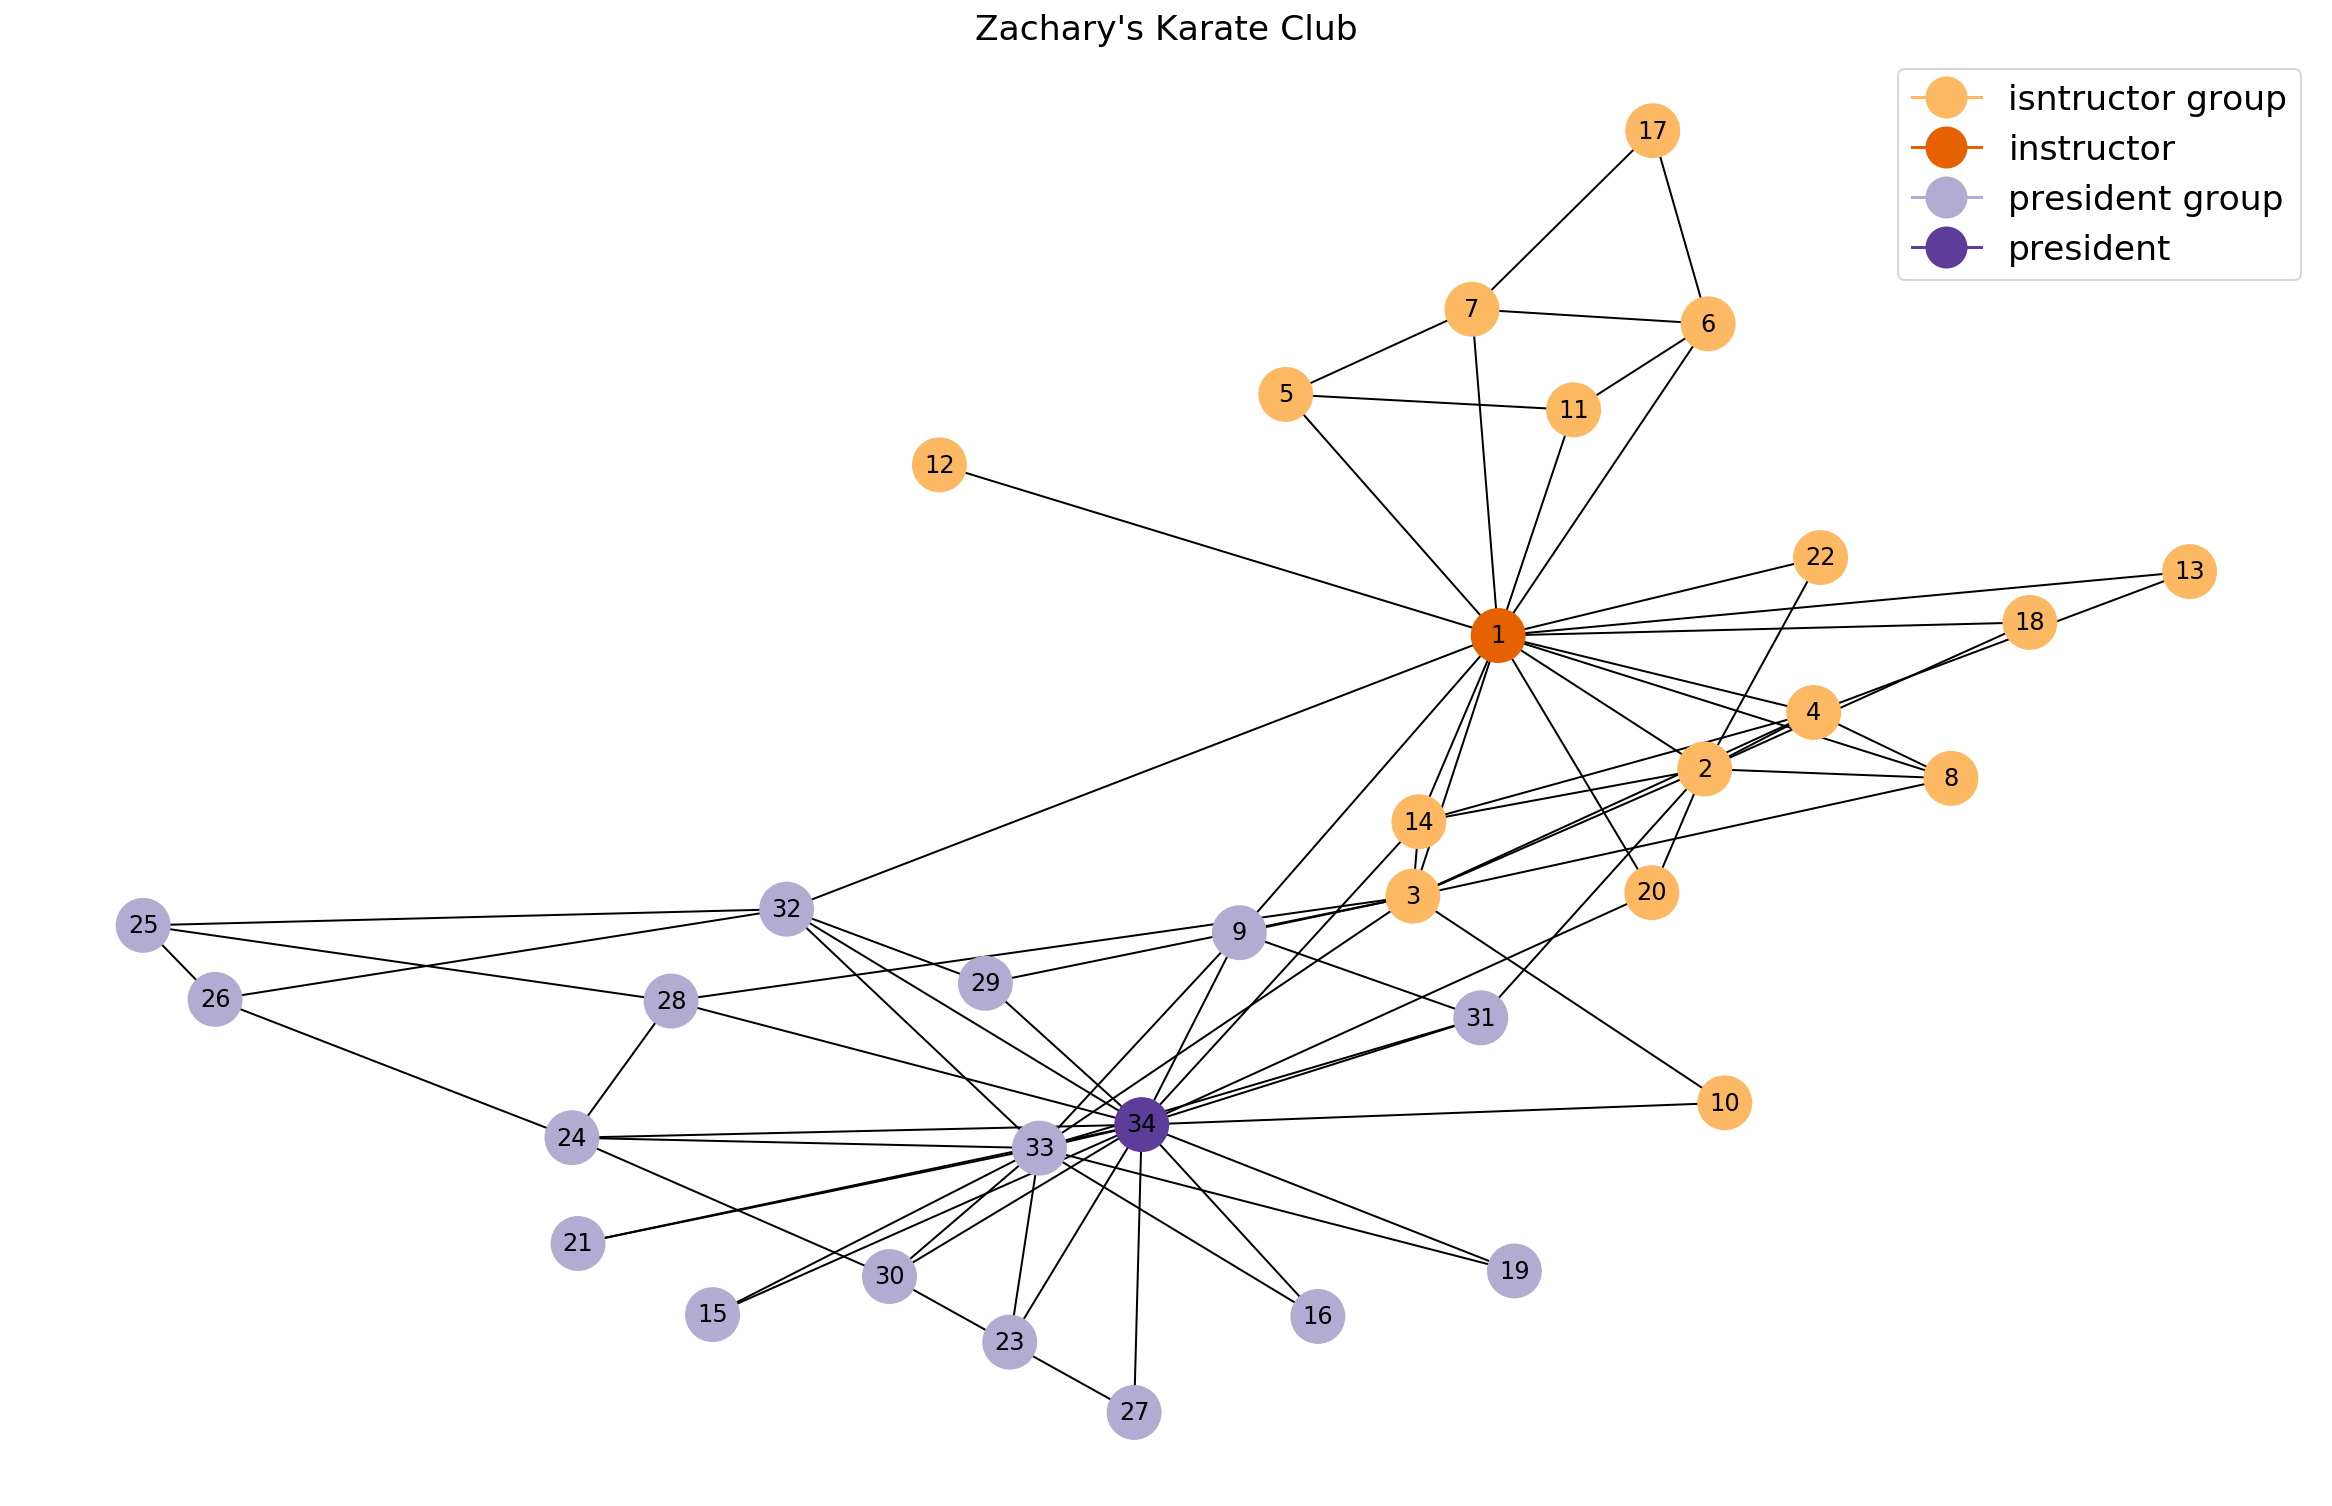

In [37]:
zcolor_map3 = []
for node in ZKCG2:
    if node == 1:
        zcolor_map3.append('#e66101')
    else:
        if node == 34:
            zcolor_map3.append('#5e3c99')
        else:
            if ZKCG2.nodes[node]['subgraph'] == 0:
                zcolor_map3.append('#fdb863')
            else: 
                zcolor_map3.append('#b2abd2')

nx.draw_spring(ZKCG2, node_color=zcolor_map3, with_labels=True , node_size=700)

legend_elements = [Line2D([0], [0], marker='o', color='#fdb863', label='isntructor group', markerfacecolor='#fdb863', markersize=20),
                   Line2D([0], [0], marker='o', color='#e66101', label='instructor', markerfacecolor='#e66101', markersize=20),
                   Line2D([0], [0], marker='o', color='#b2abd2', label='president group', markerfacecolor='#b2abd2', markersize=20),
                   Line2D([0], [0], marker='o', color='#5e3c99', label='president', markerfacecolor='#5e3c99', markersize=20)
                  ]

plt.legend(handles=legend_elements , fontsize='xx-large')
plt.title("Zachary's Karate Club" , fontsize='xx-large')
plt.show()

<br><a href="http://konect.uni-koblenz.de/networks/subelj_euroroad"><h1>E-Roads Network</h1></a>

<p>
This is the international E-road network, a road network located mostly in Europe. The network is undirected; nodes represent cities and an edge between two nodes denotes that they are connected by an E-road.
</p>
<p>
In order to obtain a more meaningful visualization, we took only the data regarding Italian cities.
</p>

<p>
per una maggiore chiarezza del grafico, abbiamo ripulito il dataset, accorpando le città molto vicine tra loro(come, ad es, Fiano Romano e Roma)
</p>

In [69]:
import sys
sys.path.append('scripts')

import italian_cities_pos as icp

In [70]:
eroadsdf = pd.read_csv('data/subelj_euroroad/myout.euroroad', skiprows=2, header=None, sep=',')
eroadsdf.columns = ['city1', 'city2']
eroadsG = nx.from_pandas_edgelist(eroadsdf, source='city1', target='city2')

print(nx.info(eroadsG))

Name: 
Type: Graph
Number of nodes: 69
Number of edges: 87
Average degree:   2.5217


In [71]:
eroadsG.nodes

NodeView(('Aosta', 'Ivrea', 'Vercelli', 'Torino', 'Alessandria', 'Genova', 'Asti', 'Grosseto', 'Roma', 'Pisa', 'La Spezia', 'Buonfornello', 'Palermo', 'Sassari', 'Cagliari', 'Olbia', 'Como', 'Milano', 'Piacenza', 'Brescia', 'Gravellona Toce', 'Parma', 'Modena', 'Alcamo', 'Mazara del Vallo', 'Verona', 'Bologna', 'Firenze', 'Pescara', 'Fortezza', 'Bolzano', 'San Candido', 'Trento', 'Mestre', 'Cesena', 'Perugia', 'Ravenna', 'Rimini', 'Napoli', 'Salerno', 'Avellino', 'Sicignano degli Alburni', 'Cosenza', 'Potenza', 'Lamezia', 'Reggio Calabria', 'Catanzaro', 'Crotone', 'Metaponto', 'Savona', 'Messina', 'Catania', 'Siracusa', 'Enna', 'Gela', 'Tarvisio', 'Udine', 'Trieste', 'Fano', 'Ancona', 'Arezzo', 'Canosa di Puglia', 'Bari', 'Benevento', 'Brindisi', 'Taranto', 'Susa', 'Cuneo', 'Trapani'))

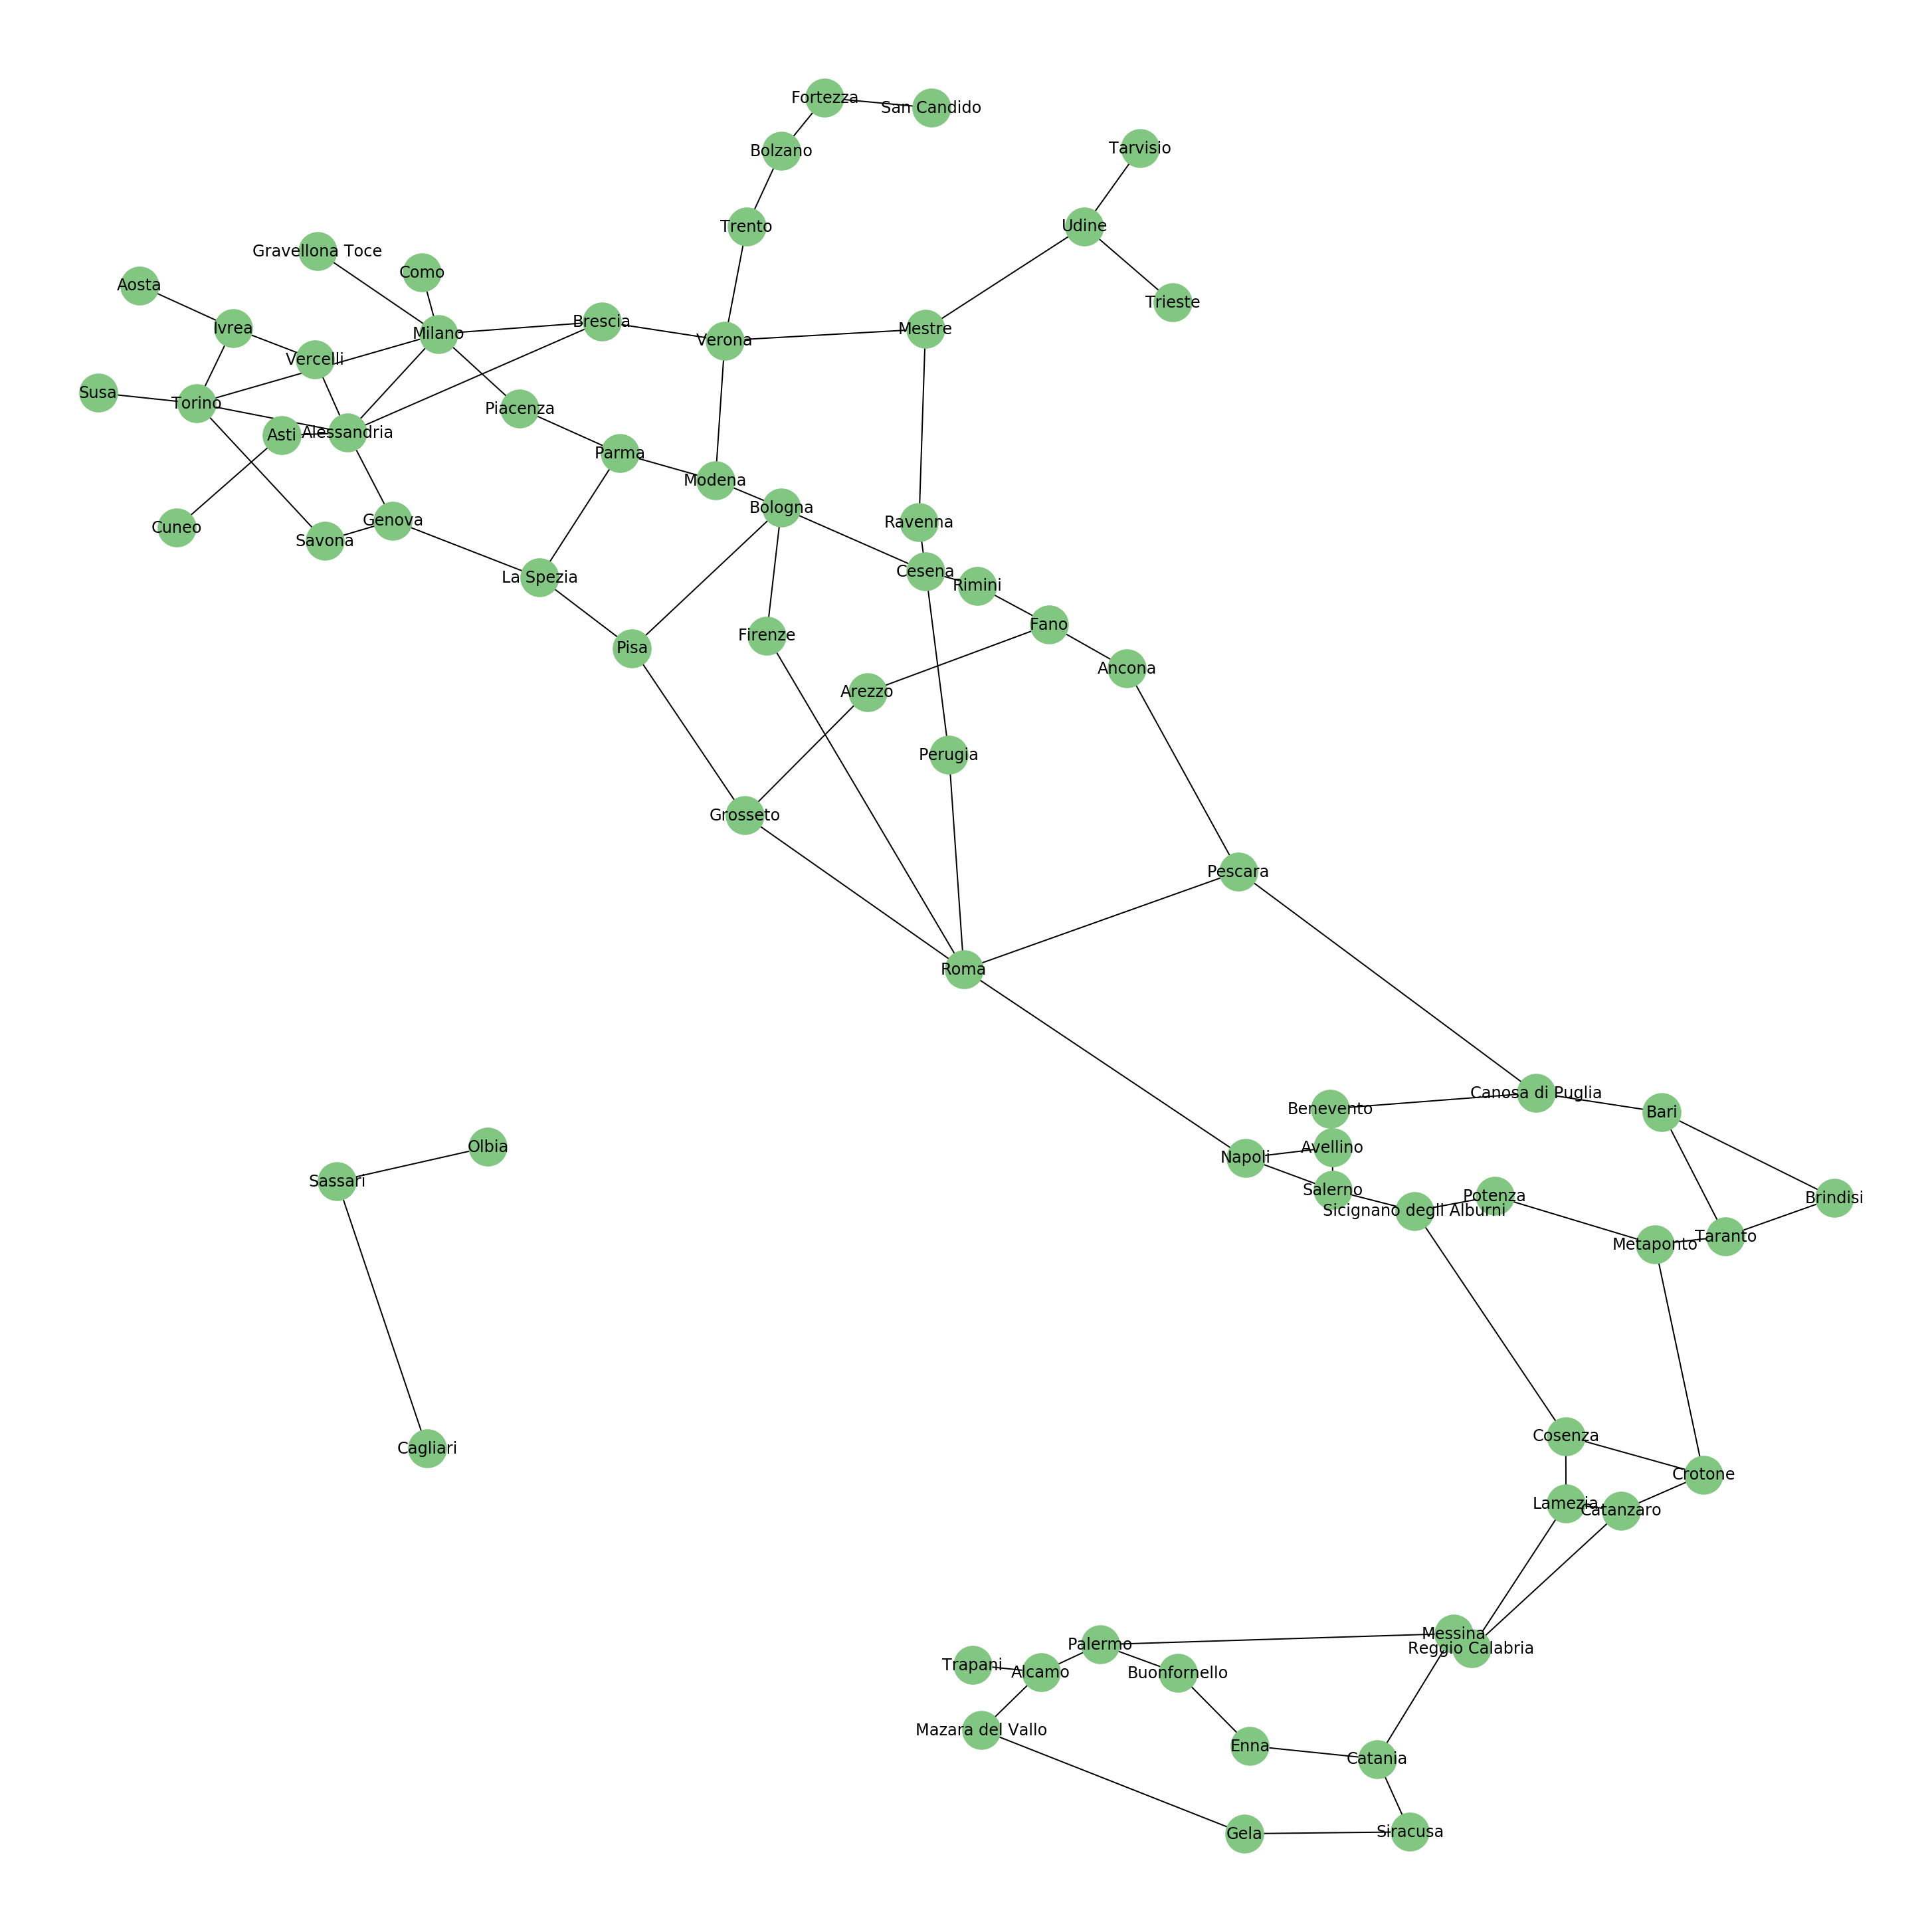

In [72]:
plt.rcParams["figure.figsize"] = (20,20)

nx.draw(eroadsG, pos=icp.pos(), with_labels=True , node_color='#81c781' , node_size=800 , font_size=12)

Che zone sono raggiungibili usando solo le E-roads? Cerco i connected components del grafico

In [73]:
ccsubgraphseroads = list(connected_component_subgraphs(eroadsG))
ccsubgraphseroads

In [74]:
for i, g in enumerate(ccsubgraphseroads):
    for n in g.nodes():
        eroadsG.nodes[n]['subgraph'] = i

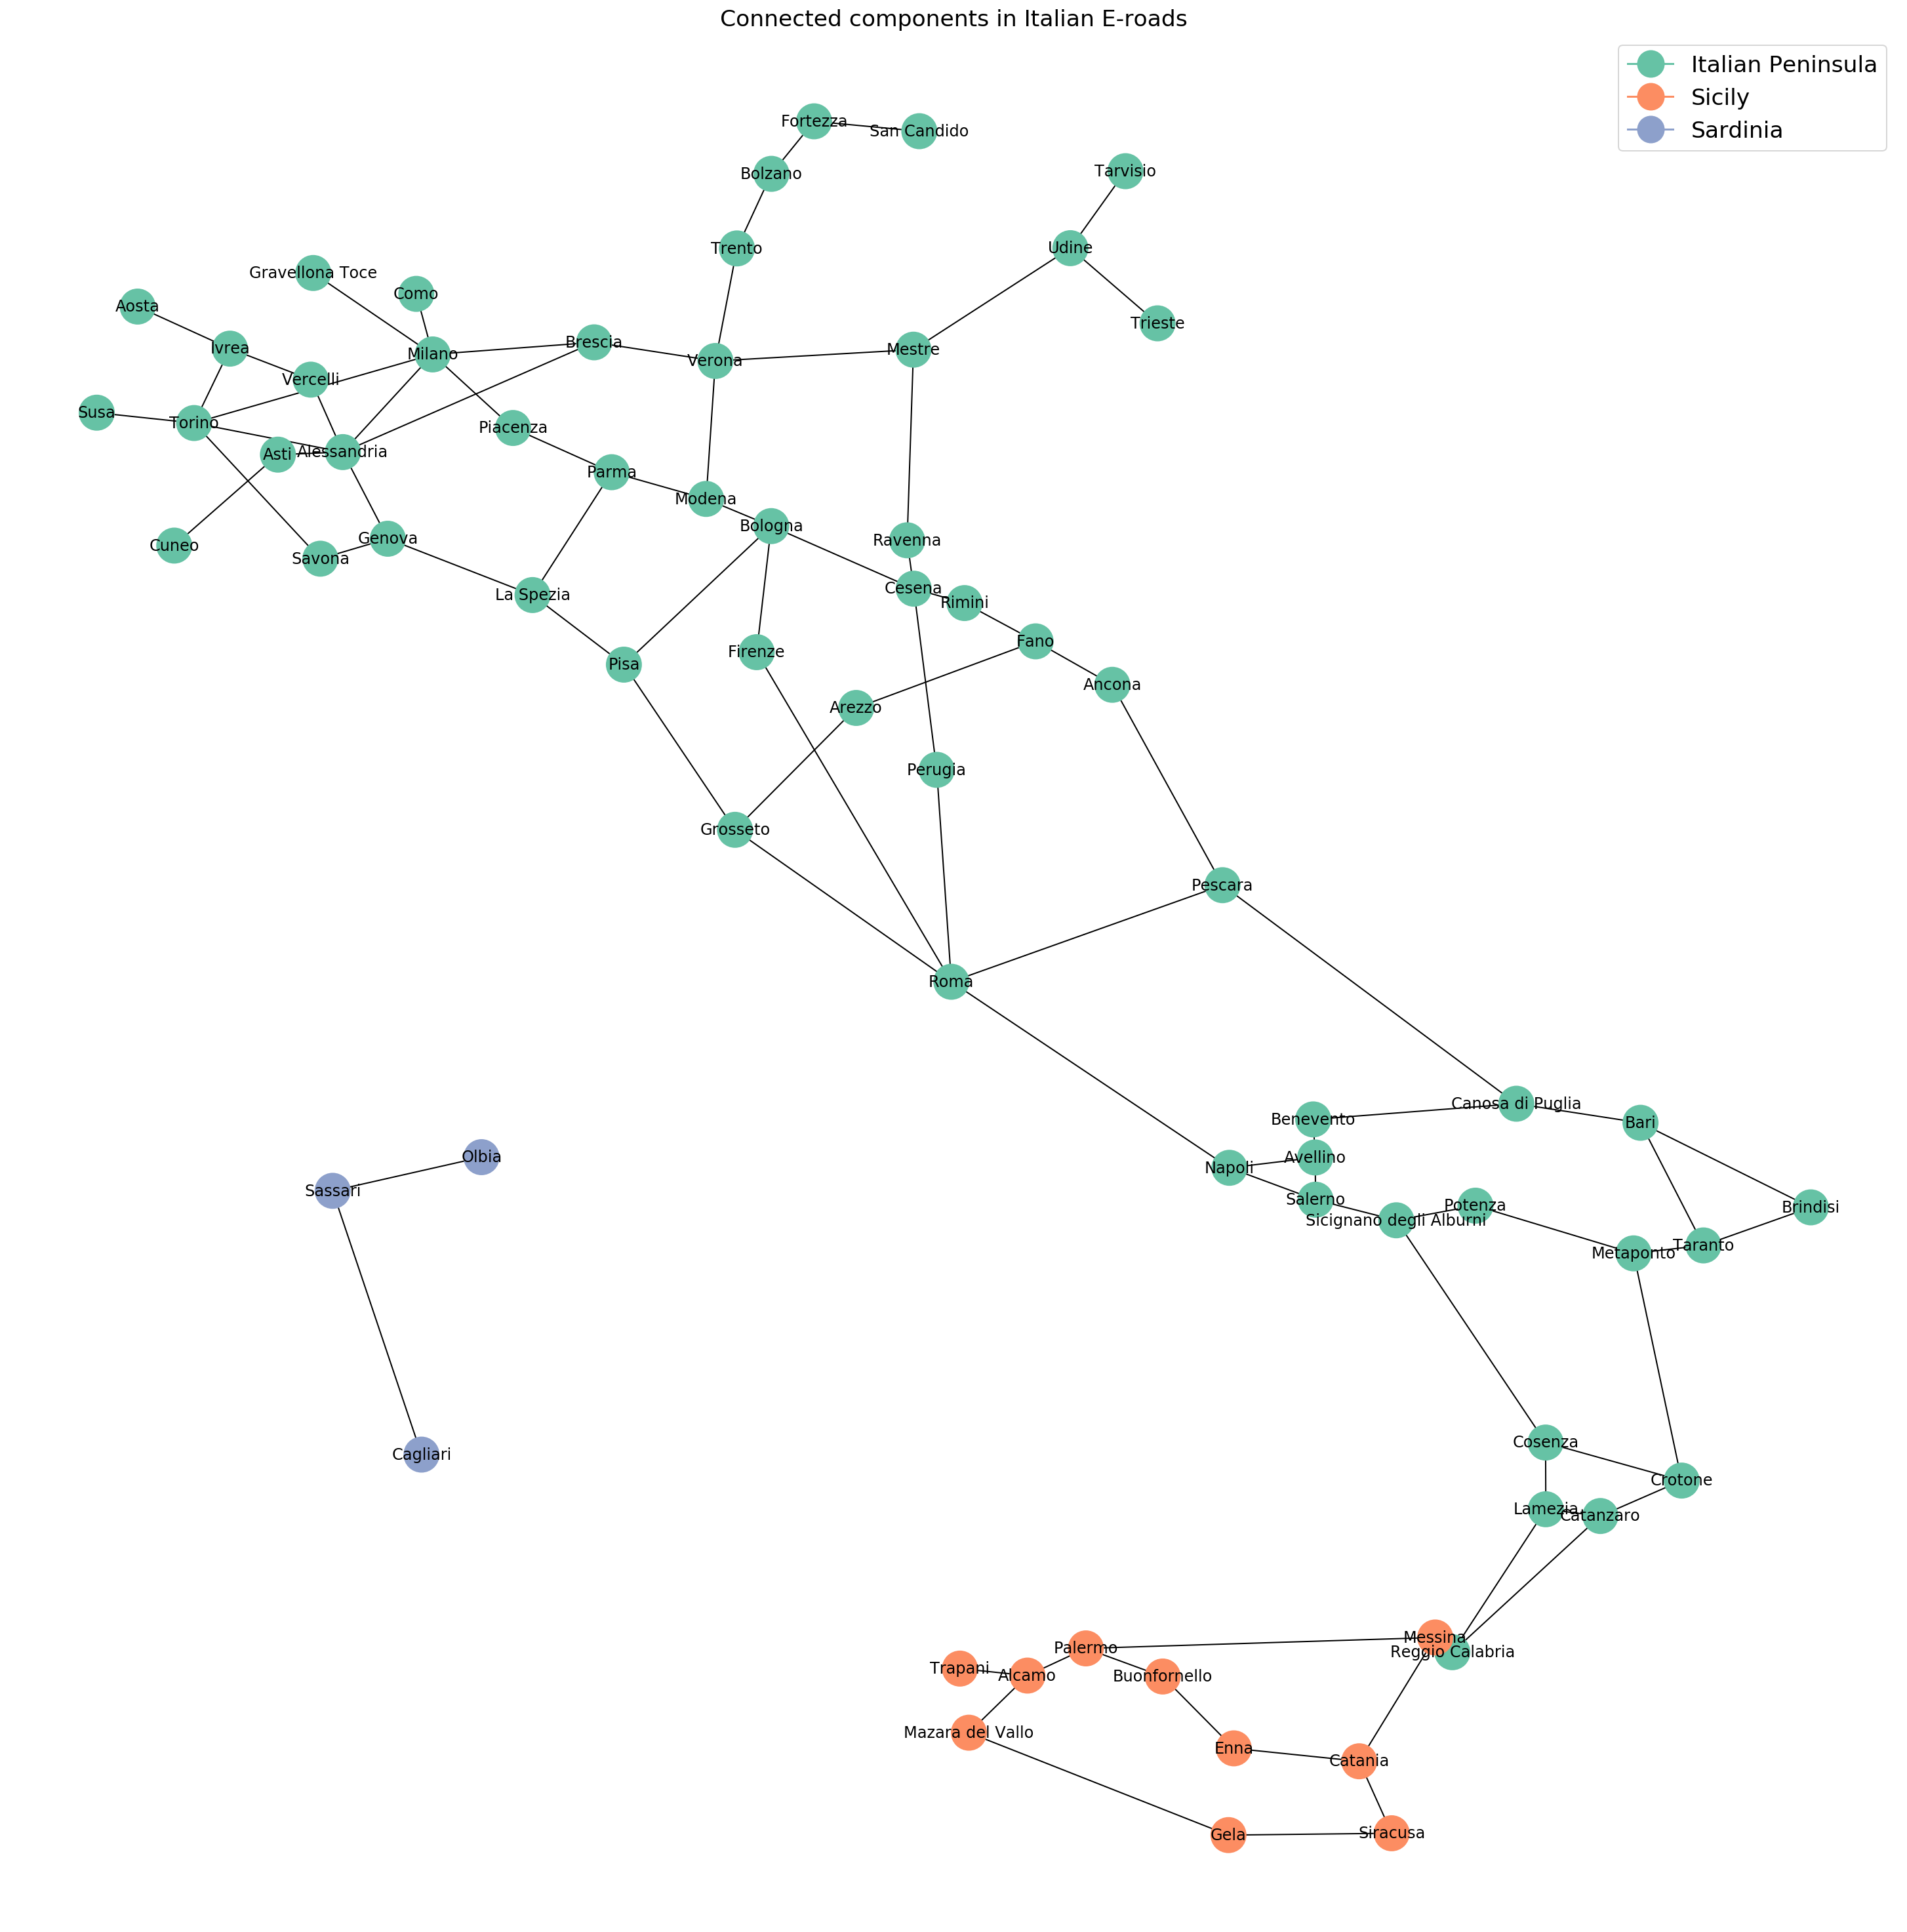

In [75]:
ercolor_map = []
for node in eroadsG:
    if eroadsG.nodes[node]['subgraph'] == 0:
        ercolor_map.append('#66c2a5')
    else:
        if eroadsG.nodes[node]['subgraph'] == 1:
            ercolor_map.append('#fc8d62')
        else:
            ercolor_map.append('#8da0cb')

# drawing with a spring layout can help visualize the communities
nx.draw(eroadsG, pos=icp.pos(), node_color=ercolor_map, with_labels=True , node_size=700)

legend_elements = [Line2D([0], [0], marker='o', color='#66c2a5', label='Italian Peninsula', markerfacecolor='#66c2a5', markersize=20),
                   Line2D([0], [0], marker='o', color='#fc8d62', label='Sicily', markerfacecolor='#fc8d62', markersize=20),
                   Line2D([0], [0], marker='o', color='#8da0cb', label='Sardinia', markerfacecolor='#8da0cb', markersize=20)
                  ]

plt.legend(handles=legend_elements , fontsize='xx-large')
plt.title("Connected components in Italian E-roads" , fontsize='xx-large')
plt.show()

Il dataset non copre le tratte marittime, quindi le isole fanno parte di connected components separati -> non esiste un percorso tra due connected components, e esiste un percorso tra tutti i nodi di un connected component.

Una cosa interessante che si può fare con un grafo di questo genere è cercare il cammino più breve tra due nodi:
Supponiamo ad esempio di voler andare da Torino a Taranto. Purtroppo nel dataset mancano indicazioni sulla luinghezza delle strade e sul traffico, quindi i risultati si limiteranno e vedere il percorso che passa per meno città.

<code>nx.shortest_path(G, source, target)</code> gives us a list of nodes that exist within one of the shortest paths between the two nodes. (Not all paths are guaranteed to be found.)

In [76]:
nx.shortest_path(eroadsG, 'Torino', 'Taranto')

['Torino',
 'Alessandria',
 'Genova',
 'La Spezia',
 'Pisa',
 'Grosseto',
 'Roma',
 'Pescara',
 'Canosa di Puglia',
 'Bari',
 'Taranto']

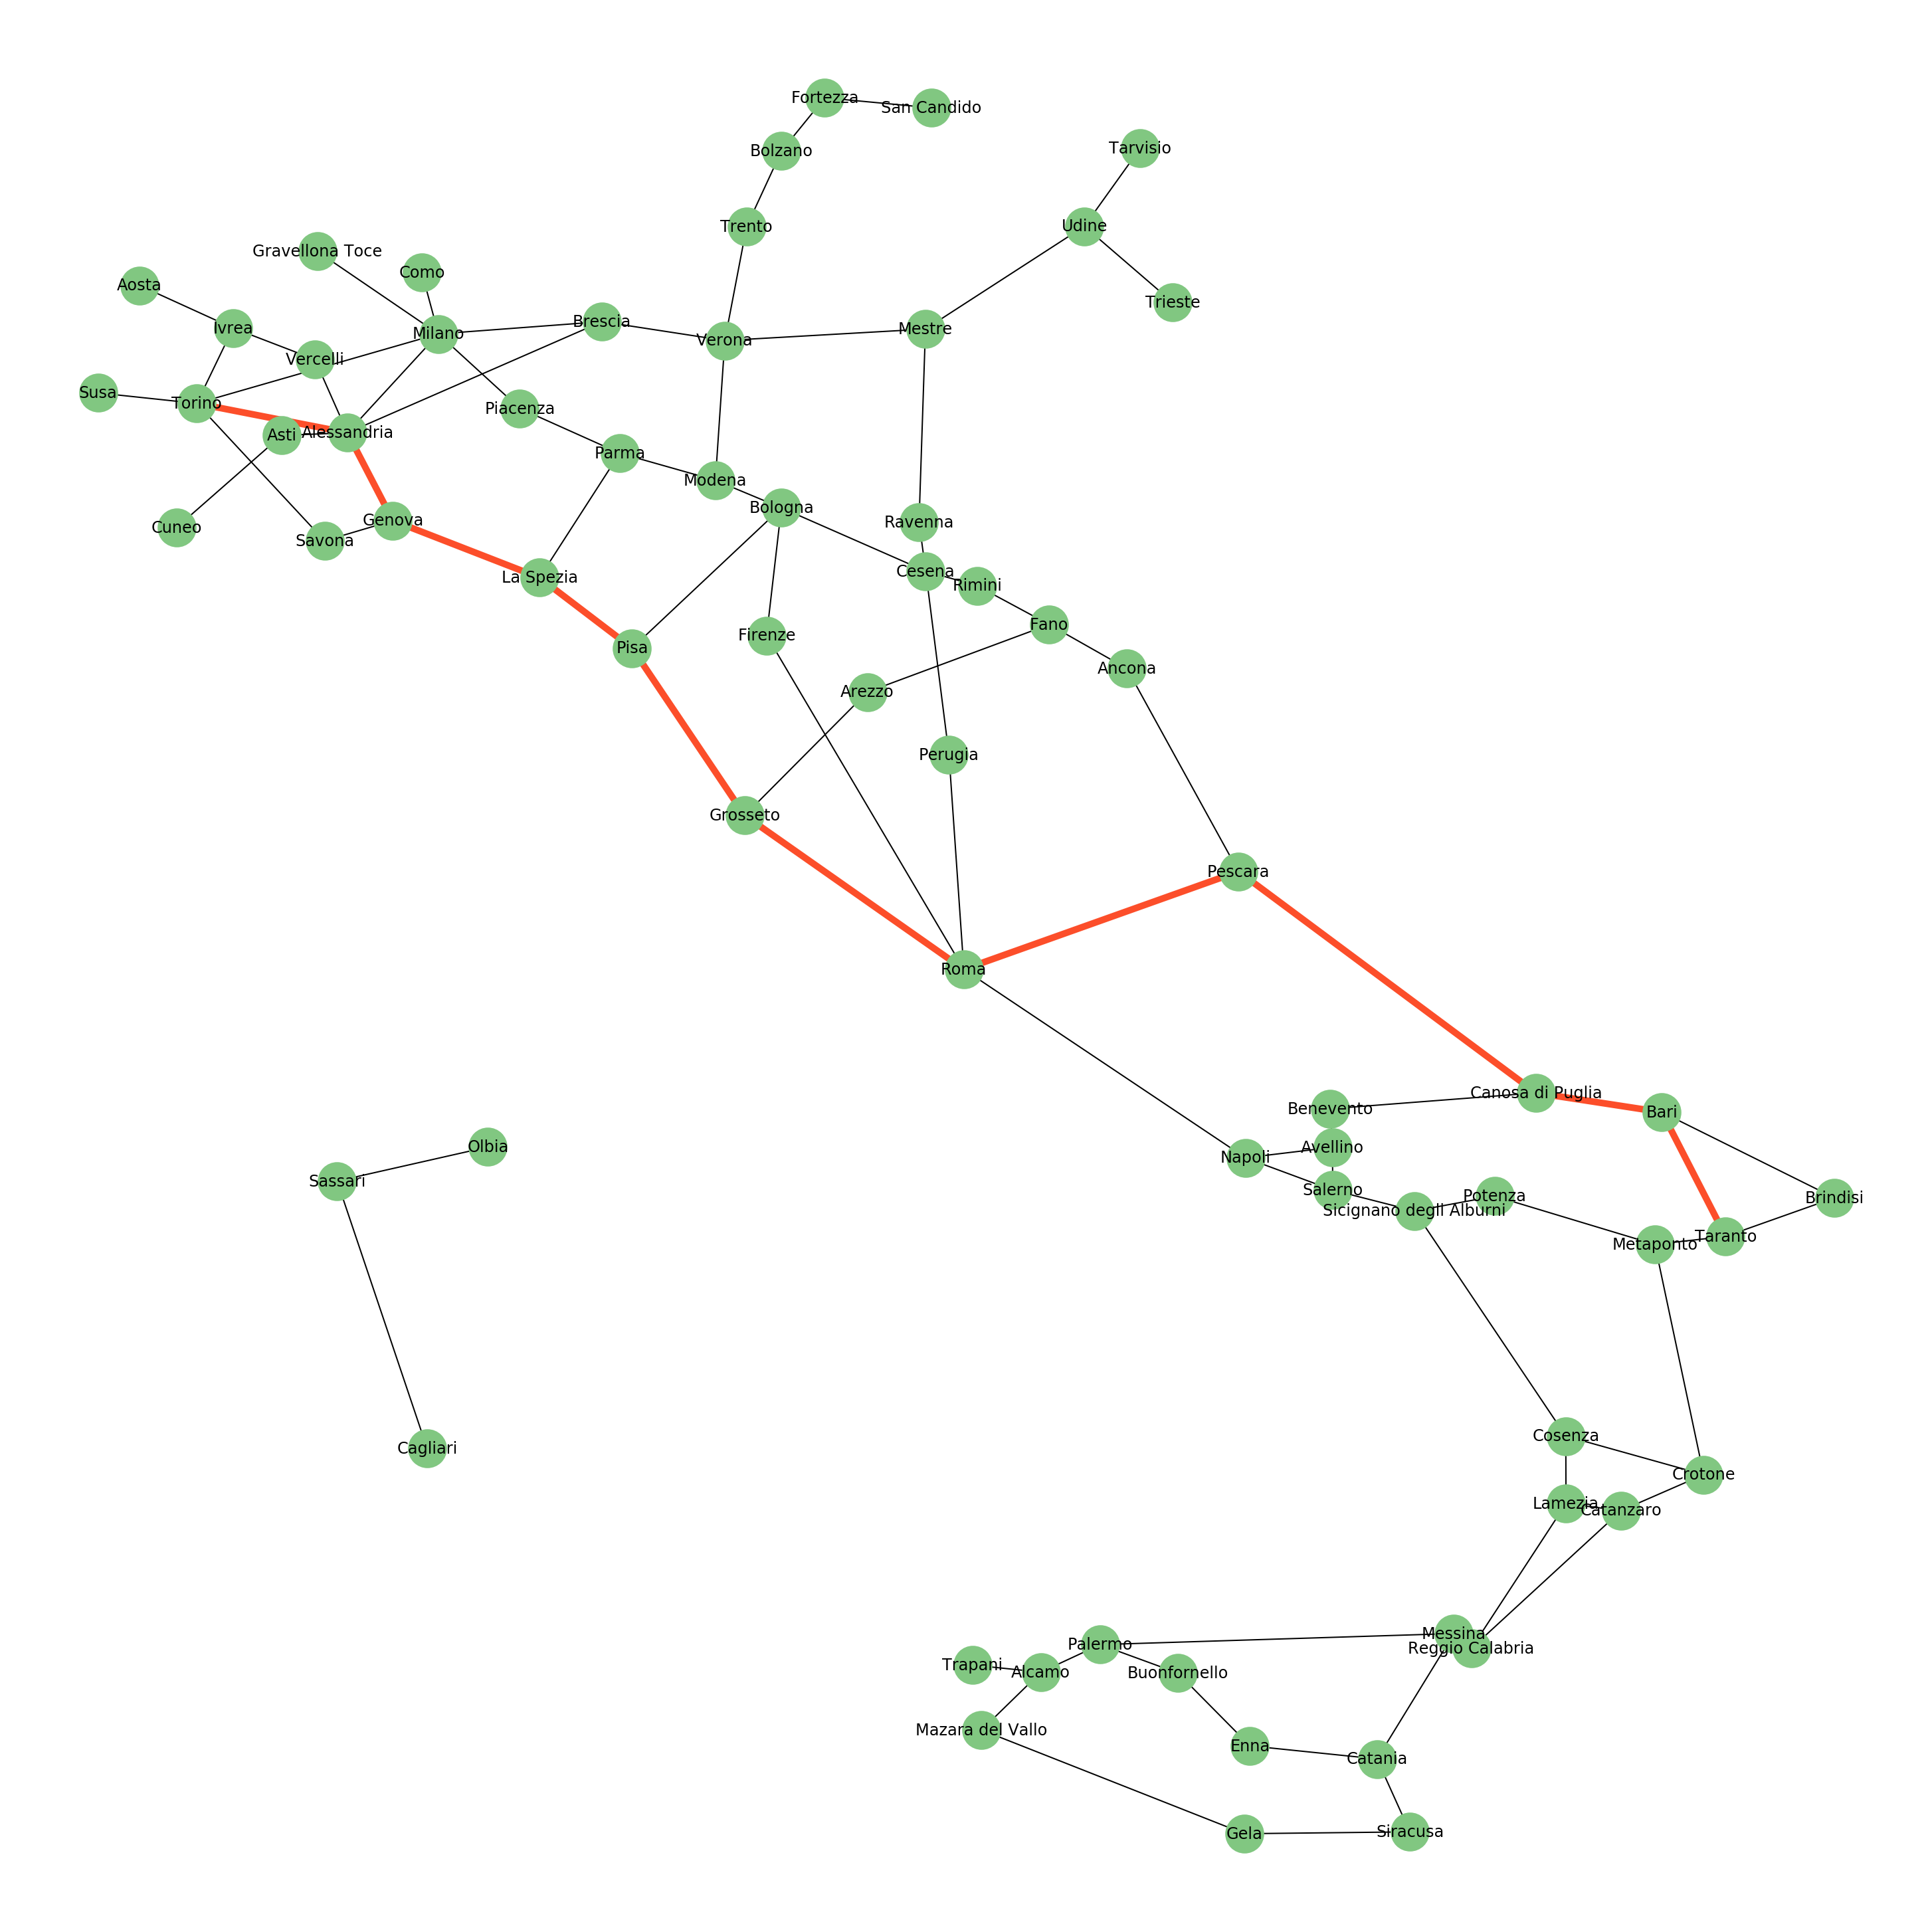

In [95]:
nx.draw(eroadsG, pos=icp.pos(), with_labels=True , node_color='#81c781' , node_size=800 , font_size=12)
path = nx.shortest_path(eroadsG, 'Torino', 'Taranto')
path_edges = list(zip(path,path[1:]))
nx.draw_networkx_edges(eroadsG , pos=icp.pos() , edgelist=path_edges , edge_color='#fc4e2a',width=5)

plt.show()

tra due nodi possono esistere anche più shortest path: ad esempio, per andare da Napoli a Brindisi ho due possibilità:

In [94]:
list(nx.all_shortest_paths(eroadsG, 'Napoli', 'Brindisi'))

[['Napoli', 'Roma', 'Pescara', 'Canosa di Puglia', 'Bari', 'Brindisi'],
 ['Napoli', 'Avellino', 'Benevento', 'Canosa di Puglia', 'Bari', 'Brindisi']]

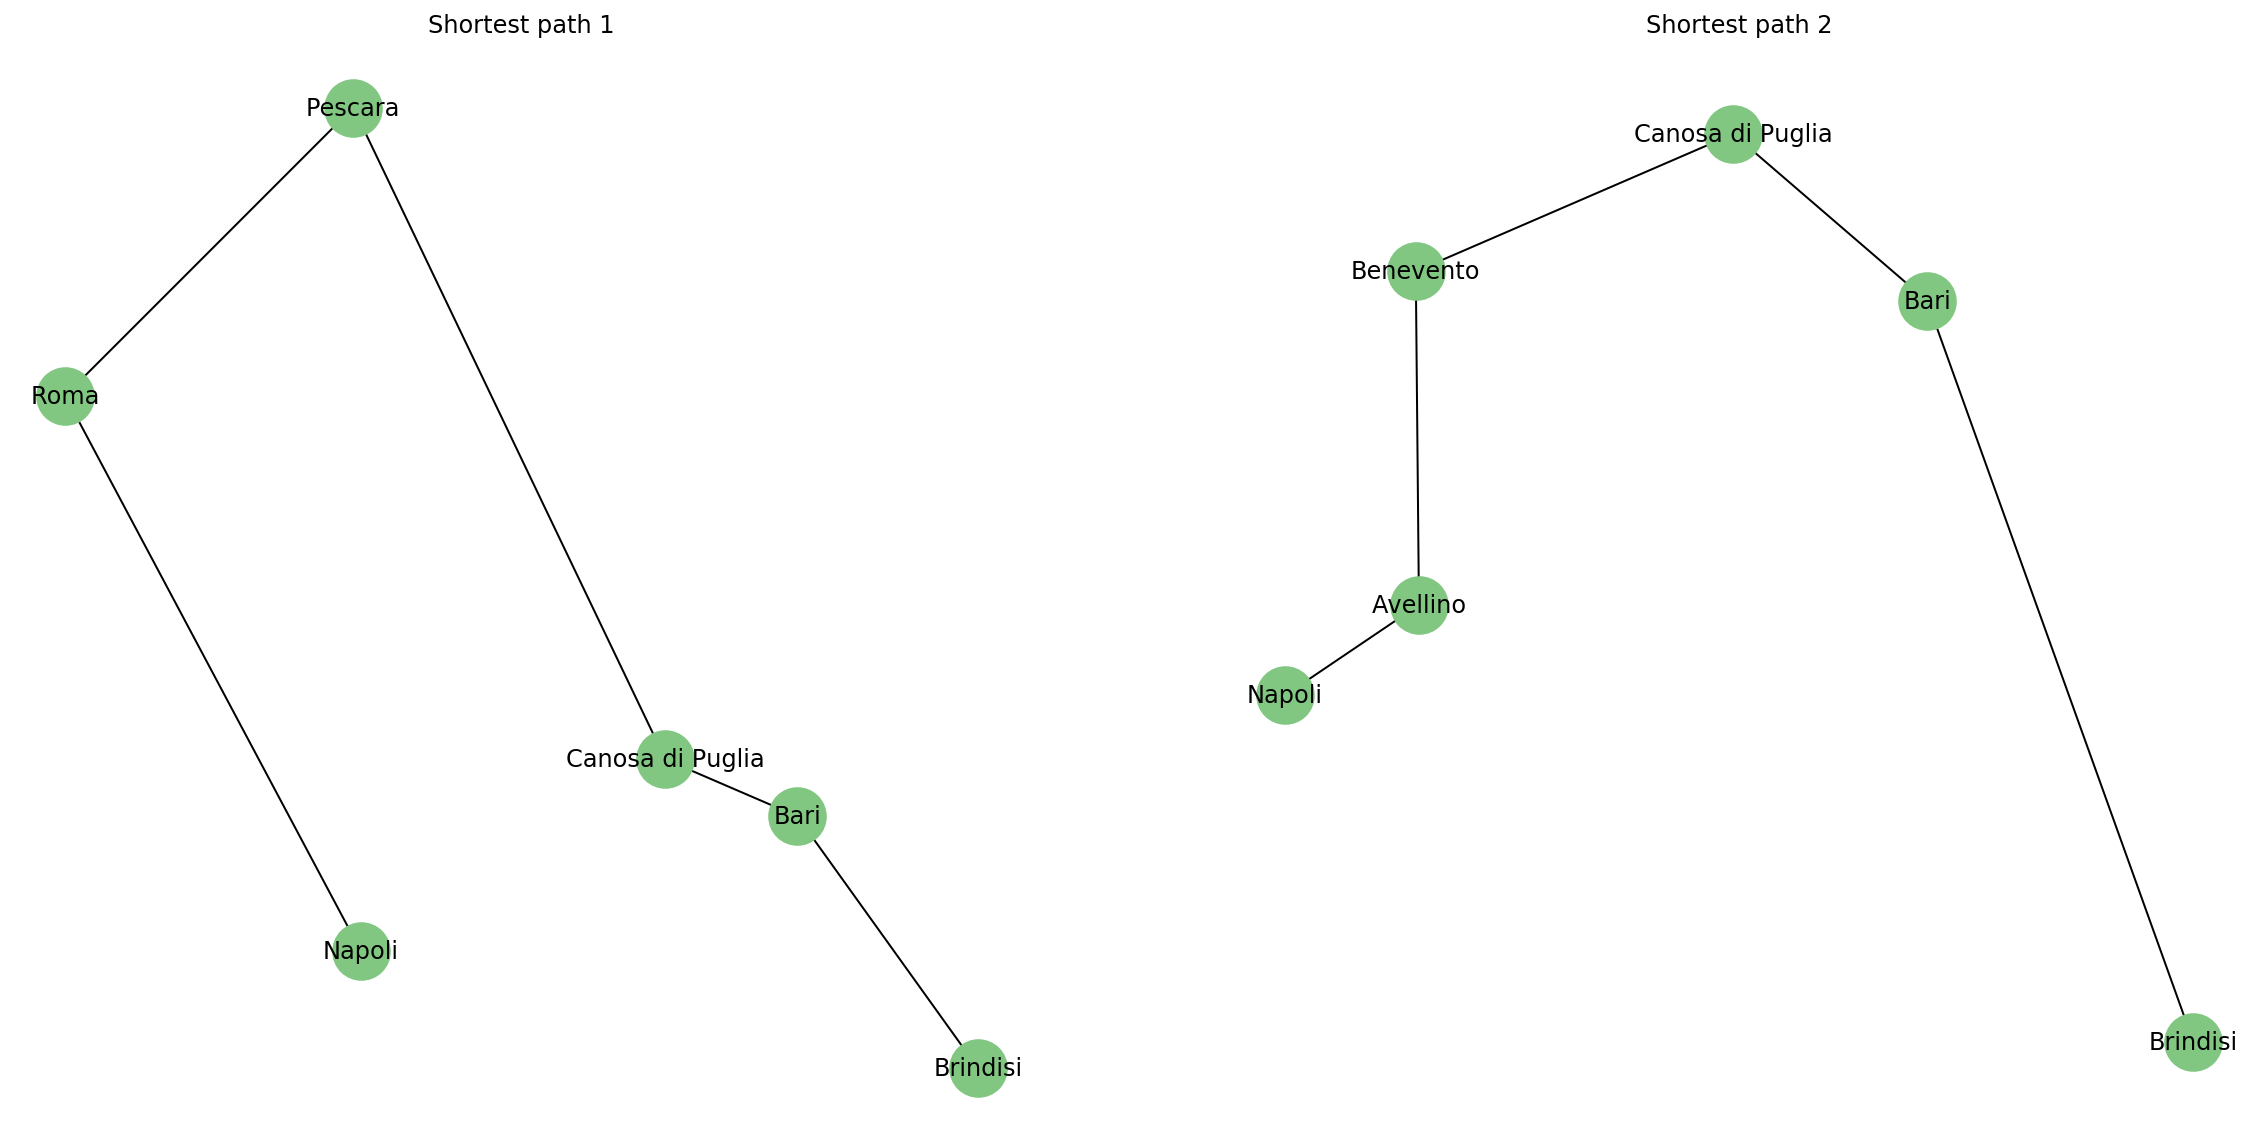

In [105]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
nodessp1 = list(nx.all_shortest_paths(eroadsG, 'Napoli', 'Brindisi'))[0]
sp1G = eroadsG.subgraph(nodessp1)
nx.draw(sp1G,  pos=icp.pos(), with_labels=True , node_color='#81c781' , node_size=800 , font_size=12)
plt.title('Shortest path 1')

plt.subplot(1, 2, 2)
nodessp2 = list(nx.all_shortest_paths(eroadsG, 'Napoli', 'Brindisi'))[1]
sp2G = eroadsG.subgraph(nodessp2)
nx.draw(sp2G,  pos=icp.pos(), with_labels=True , node_color='#81c781' , node_size=800 , font_size=12)
plt.title('Shortest path 2')

plt.show()

possiamo anche calcolare la lunghezza media degli shortest path di un grafo connesso

In [109]:
print("Italian Peninsula average shortest path length: ")
print (nx.average_shortest_path_length(ccsubgraphseroads[0]))

print("Sicily average shortest path length: ")
print(nx.average_shortest_path_length(ccsubgraphseroads[1]))

print("Sardinia average shortest path length: ")
print(nx.average_shortest_path_length(ccsubgraphseroads[2]))

Italian Peninsula average shortest path length: 
5.80974025974026
Sicily average shortest path length: 
2.2888888888888888
Sardinia average shortest path length: 
1.3333333333333333


as we expected, the average length in the islands is much shorter than the one on the peninsula.

Vogliamo capire quali nodi fungono da crocevia: calcolo la betweenness centrality, che considera il numero di shortest path che passano per un nodo.

In [210]:
beteroads = nx.betweenness_centrality(eroadsG)

dataeroads = pd.Series(beteroads).sort_values(ascending=False)[0:10]

print (dataeroads)

Roma                       0.284711
Napoli                     0.168935
Verona                     0.167001
Pisa                       0.155437
Grosseto                   0.149081
La Spezia                  0.144609
Salerno                    0.137255
Bologna                    0.130068
Alessandria                0.129450
Sicignano degli Alburni    0.122769
dtype: float64


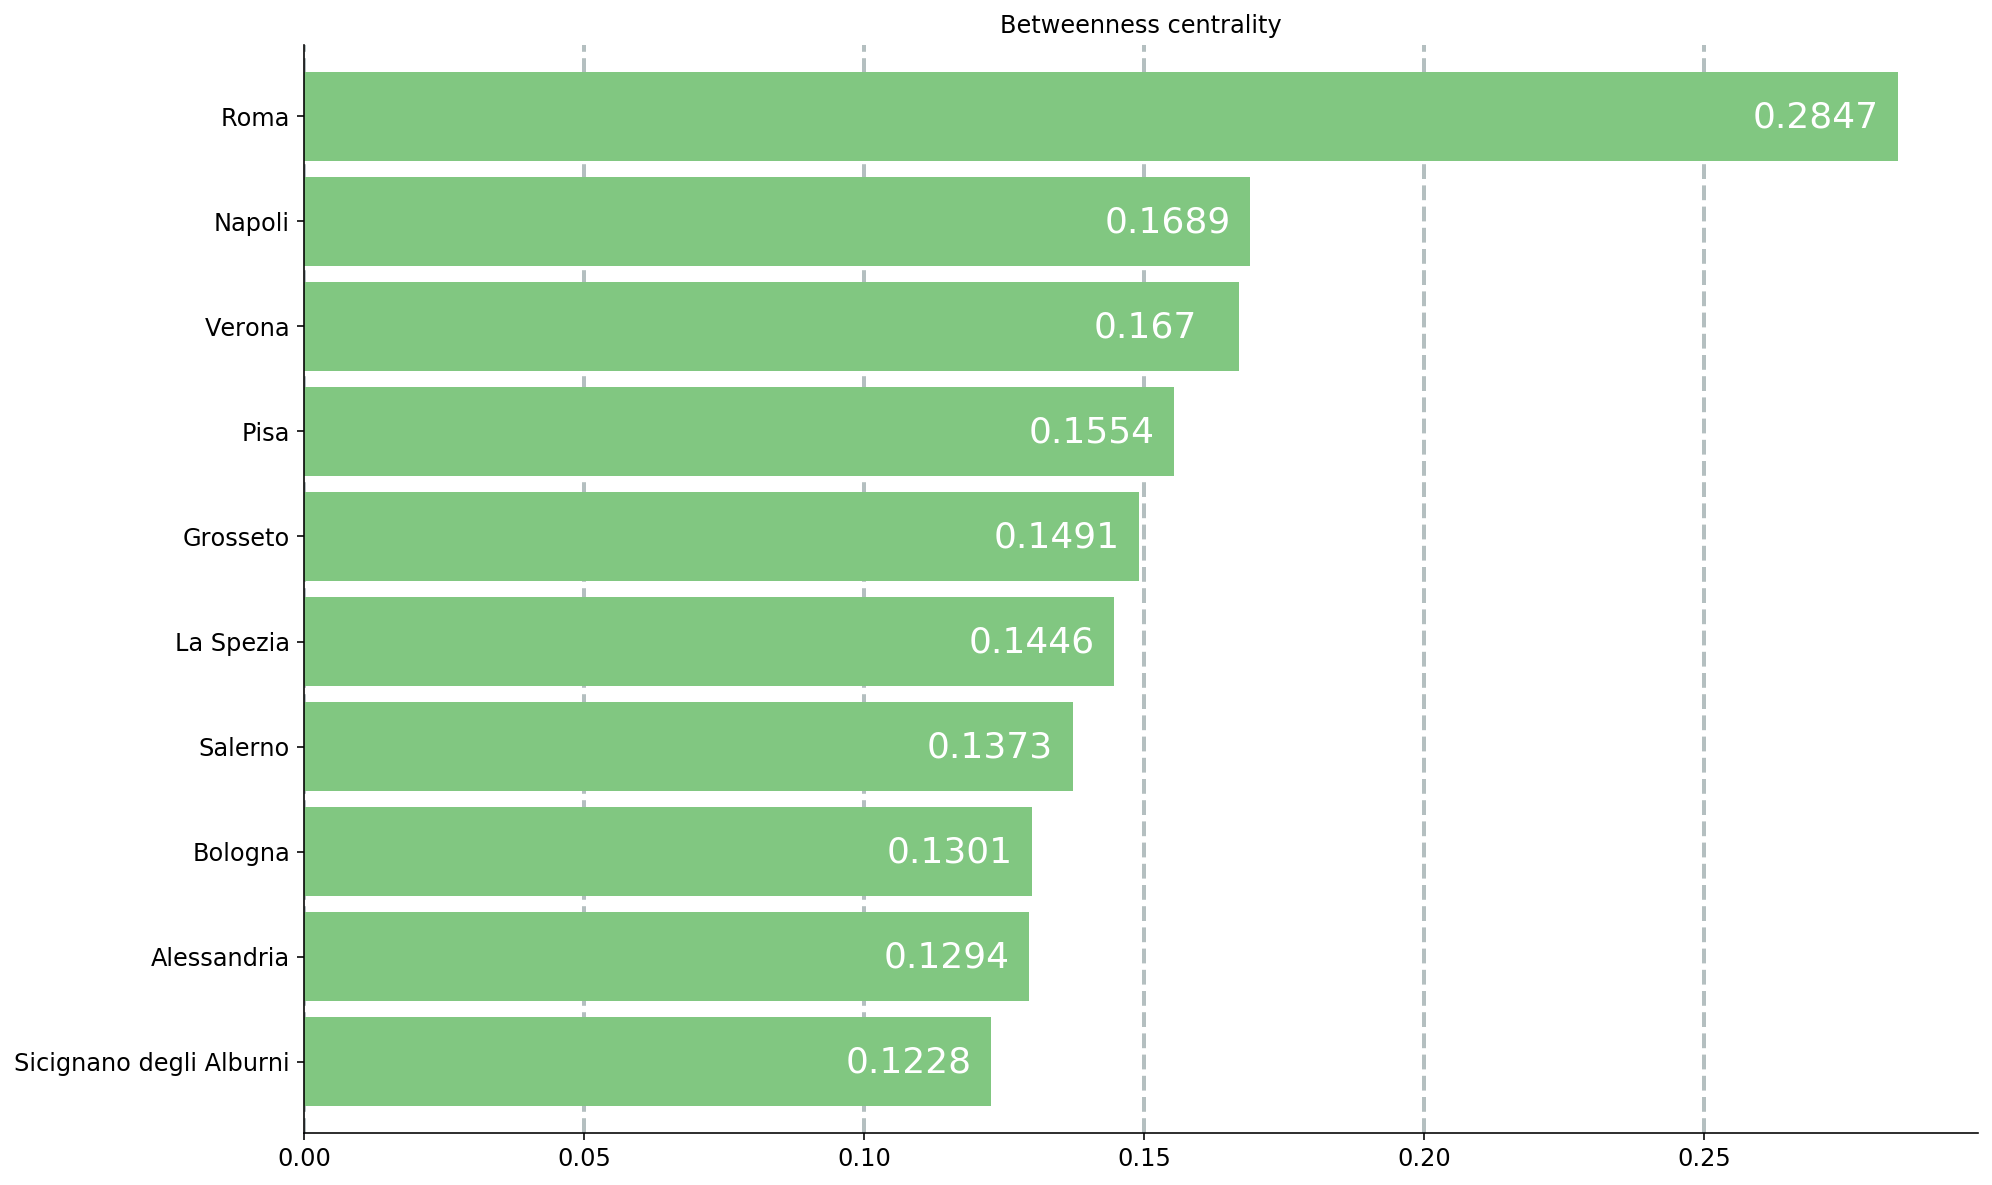

In [294]:
dataeroads = dataeroads.sort_values(ascending=True)

ax = dataeroads.plot(kind='barh', zorder=2, width=0.85, fontsize=12, color='#81c781' , figsize=(15,10) ,
               title="Betweenness centrality")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

counter = 0
for i in ax.patches:
    ax.text(i.get_width() - 0.026 , i.get_y() + 0.32 , round(dataeroads.get(counter) , 4) , fontsize=18,color='white')
    counter += 1

    
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.7)
plt.show()